# Advanced Regression

Author :  K.M.Hareshkumar

Date :  17-Jan-2020


## Problem statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.


### Business Goal 

 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market

## Data Loading

#### Loading the CSV file  and getting the feel  of data

In [158]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.preprocessing import RobustScaler,StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error,r2_score
import warnings
warnings.filterwarnings('ignore')

In [159]:
train_df = pd.read_csv('train.csv')

In [160]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [161]:
train_df.head(4)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000


In [162]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [163]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Data Cleaning

#### Calculating Age of builing 

     - Creating new Derived metrics: totalAge_months, monthage_TillRenovation,monthage_AfterRenovation
 

In [164]:
train_df[['YearBuilt' ,'YearRemodAdd' ,'MoSold','YrSold' ,'SalePrice']].head(5)
train_df['totalAge_months'] = ((train_df['YrSold']- train_df['YearBuilt'])*12)+(12-(train_df['MoSold']))
train_df['monthage_TillRenovation'] = (train_df['YearRemodAdd']- train_df['YearBuilt'])*12
train_df['monthage_AfterRenovation'] = ((train_df['YrSold']- train_df['YearRemodAdd'])*12)+(12-(train_df['MoSold']))

#### Analysing the influence of SalePrice w.r.t  age of building

<AxesSubplot:xlabel='totalAge_months', ylabel='SalePrice'>

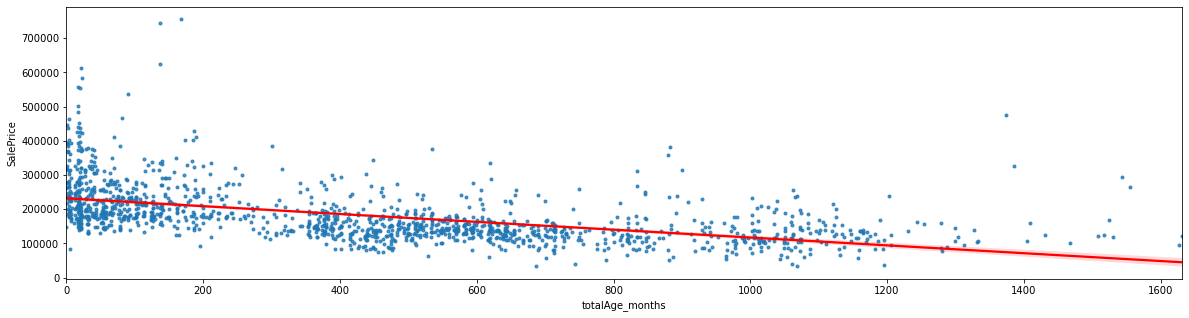

In [165]:
plt.figure(figsize=(20,5))
sns.regplot(data = train_df ,x='totalAge_months',y='SalePrice', line_kws={'color':'red'},marker='.')

#### Analysing the influence of SalePrice w.r.t  age till renvation of  building

<AxesSubplot:xlabel='monthage_TillRenovation', ylabel='SalePrice'>

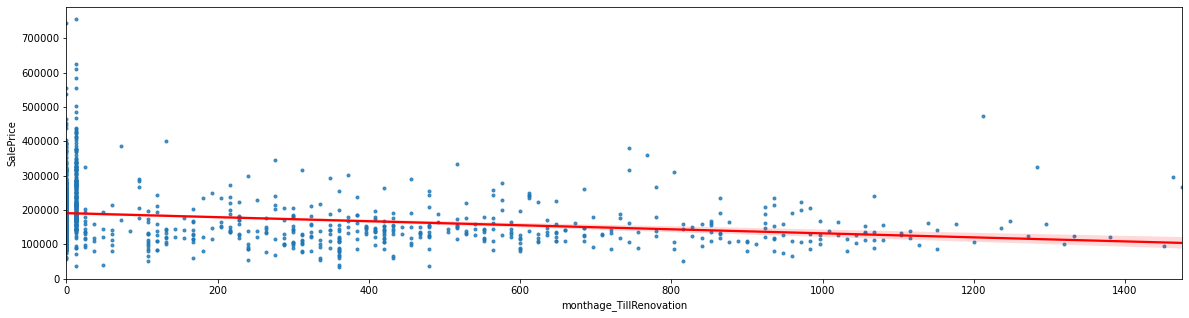

In [166]:
plt.figure(figsize=(20,5))
sns.regplot(data = train_df ,x='monthage_TillRenovation',y='SalePrice',  line_kws={'color':'red'},marker='.')


#### Analysing the influence of SalePrice w.r.t  age after  renvation of  building

<AxesSubplot:xlabel='monthage_AfterRenovation', ylabel='SalePrice'>

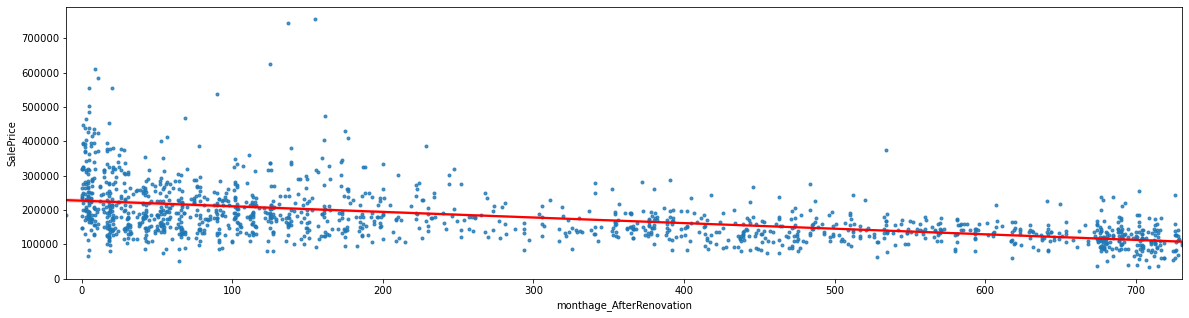

In [167]:
plt.figure(figsize=(20,5))
sns.regplot(data = train_df ,x='monthage_AfterRenovation',y='SalePrice', line_kws={'color':'red'},marker='.')

#### Removing colums whose percentage of  NULL  is more than 80

In [168]:
train_df = train_df[train_df.columns[train_df.isnull().sum()*100/len(train_df)<=80]]

#### Checking percentage of NULL values in every column

In [169]:
train_df.isnull().sum()*100/len(train_df)

Id                           0.000000
MSSubClass                   0.000000
MSZoning                     0.000000
LotFrontage                 17.739726
LotArea                      0.000000
Street                       0.000000
LotShape                     0.000000
LandContour                  0.000000
Utilities                    0.000000
LotConfig                    0.000000
LandSlope                    0.000000
Neighborhood                 0.000000
Condition1                   0.000000
Condition2                   0.000000
BldgType                     0.000000
HouseStyle                   0.000000
OverallQual                  0.000000
OverallCond                  0.000000
YearBuilt                    0.000000
YearRemodAdd                 0.000000
RoofStyle                    0.000000
RoofMatl                     0.000000
Exterior1st                  0.000000
Exterior2nd                  0.000000
MasVnrType                   0.547945
MasVnrArea                   0.547945
ExterQual   

#### Replacing Artificial NULL which are categories with  'None' 

In [170]:
train_df['BsmtQual'] = train_df['BsmtQual'].replace(np.nan, 'None')
train_df['BsmtCond']=train_df['BsmtCond'].replace(np.nan,'None')
train_df['BsmtExposure']=train_df['BsmtExposure'].replace(np.nan,'None')
train_df['BsmtFinType1']=train_df['BsmtFinType1'].replace(np.nan,'None')
train_df['BsmtFinType2']=train_df['BsmtFinType2'].replace(np.nan,'None')
train_df['FireplaceQu']=train_df['FireplaceQu'].replace(np.nan,'None')
train_df['GarageType']=train_df['GarageType'].replace(np.nan,'None')
train_df['GarageFinish']=train_df['GarageFinish'].replace(np.nan,'None')
train_df['GarageQual']=train_df['GarageQual'].replace(np.nan,'None')
train_df['GarageCond']=train_df['GarageCond'].replace(np.nan,'None')
train_df['FireplaceQu']=train_df['FireplaceQu'].replace(np.nan,'None')

#### Replacing Natural NULL  which are  in category variable with 'Mode' 

In [171]:
train_df['MasVnrType']=train_df['MasVnrType'].replace(np.nan,train_df['MasVnrType'].mode()[0])
train_df['Electrical']=train_df['Electrical'].replace(np.nan,train_df['Electrical'].mode()[0])


#### Replacing Natural NULL  which are  in continuous variable with 'Median' 

In [172]:
train_df['LotFrontage'] = train_df['LotFrontage'].fillna(train_df['LotFrontage'].median())
train_df['MasVnrArea']=train_df['MasVnrArea'].fillna(train_df['MasVnrArea'].median())
train_df['GarageYrBlt']=train_df['GarageYrBlt'].fillna(train_df['GarageYrBlt'].median())


#### Replacing Natural NULL  which are  in continuous variable with 'Median' 

In [173]:
 train_df = train_df.drop(['Id' ,'MoSold' ,'YrSold', 'YearBuilt','YearRemodAdd','GarageYrBlt'] , axis=1)

In [174]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MSSubClass                1460 non-null   int64  
 1   MSZoning                  1460 non-null   object 
 2   LotFrontage               1460 non-null   float64
 3   LotArea                   1460 non-null   int64  
 4   Street                    1460 non-null   object 
 5   LotShape                  1460 non-null   object 
 6   LandContour               1460 non-null   object 
 7   Utilities                 1460 non-null   object 
 8   LotConfig                 1460 non-null   object 
 9   LandSlope                 1460 non-null   object 
 10  Neighborhood              1460 non-null   object 
 11  Condition1                1460 non-null   object 
 12  Condition2                1460 non-null   object 
 13  BldgType                  1460 non-null   object 
 14  HouseSty

#### Visualizing corelation for continuous variables

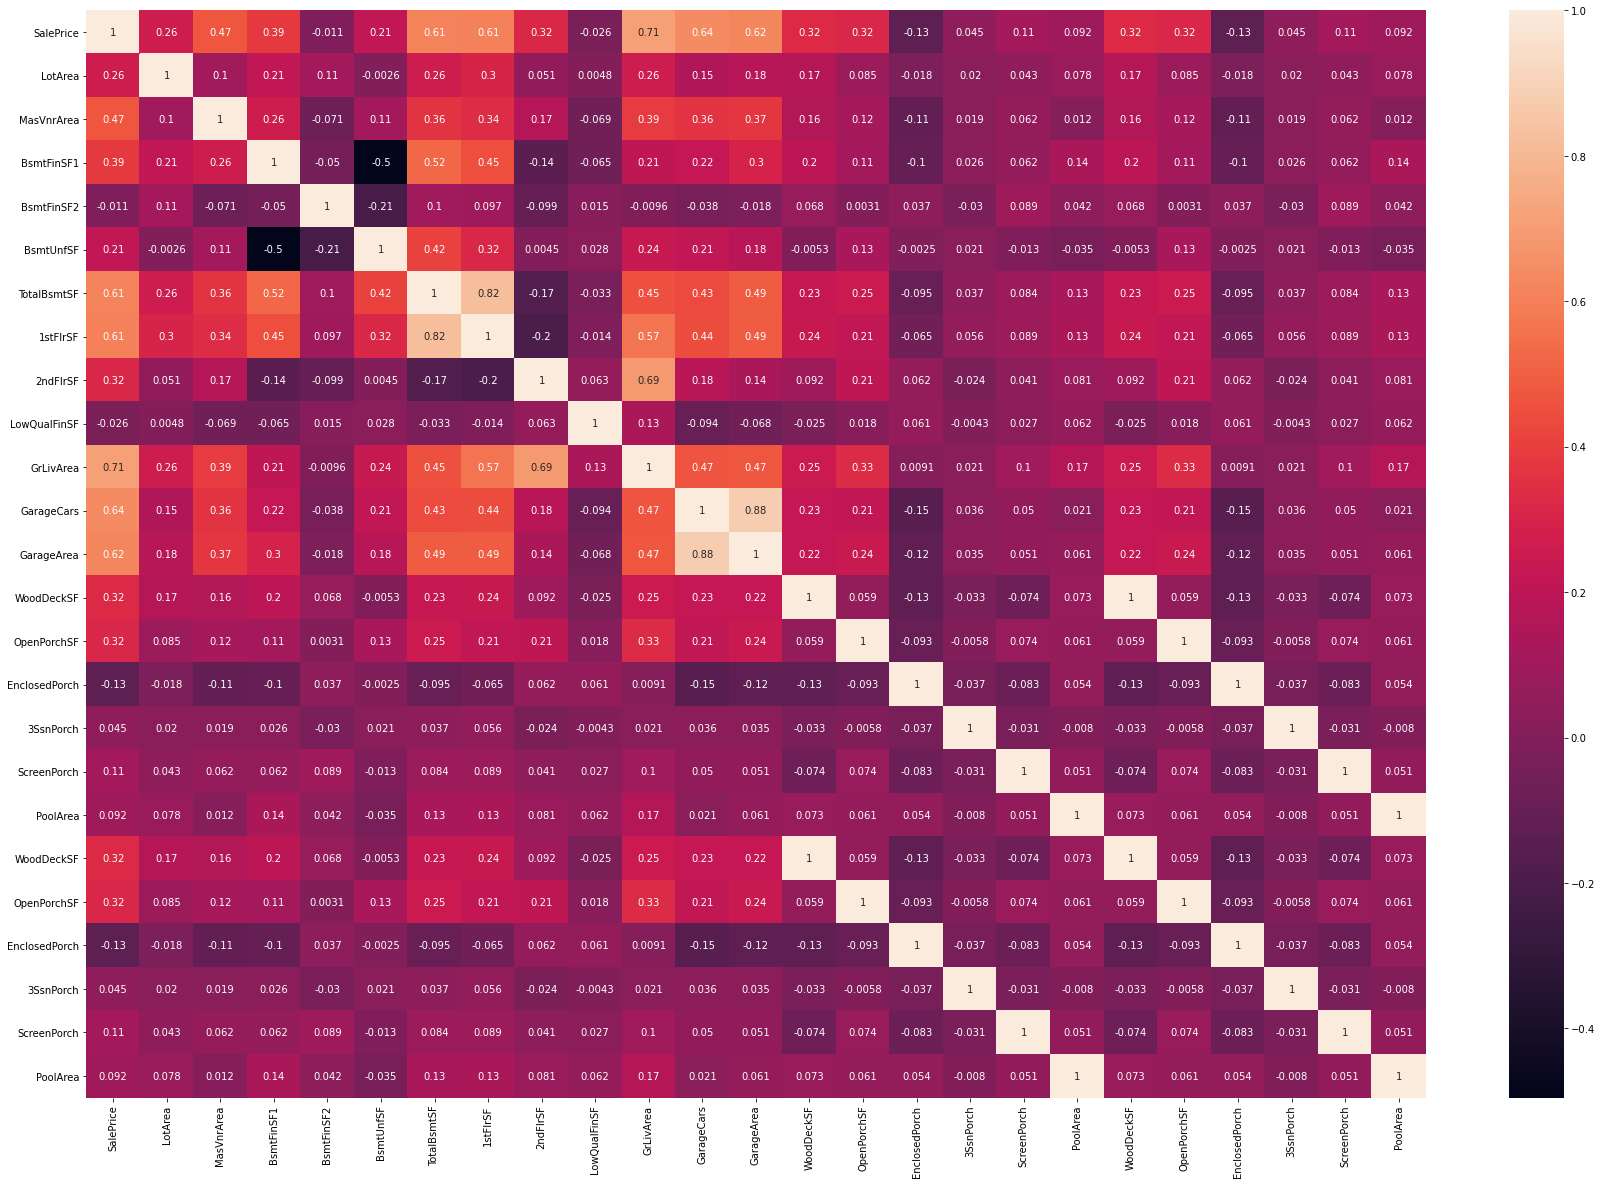

In [175]:
plt.figure(figsize=(30,20))

sns.heatmap(train_df[['SalePrice','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF' , '2ndFlrSF','LowQualFinSF','GrLivArea','GarageCars','GarageArea', 'WoodDeckSF','OpenPorchSF', 'EnclosedPorch','3SsnPorch', 'ScreenPorch' , 'PoolArea','WoodDeckSF','OpenPorchSF', 'EnclosedPorch','3SsnPorch', 'ScreenPorch' , 'PoolArea']].corr(), annot=True)
plt.show()

#### Visualizing central tendency for categorical variables

<AxesSubplot:xlabel='Exterior1st', ylabel='SalePrice'>

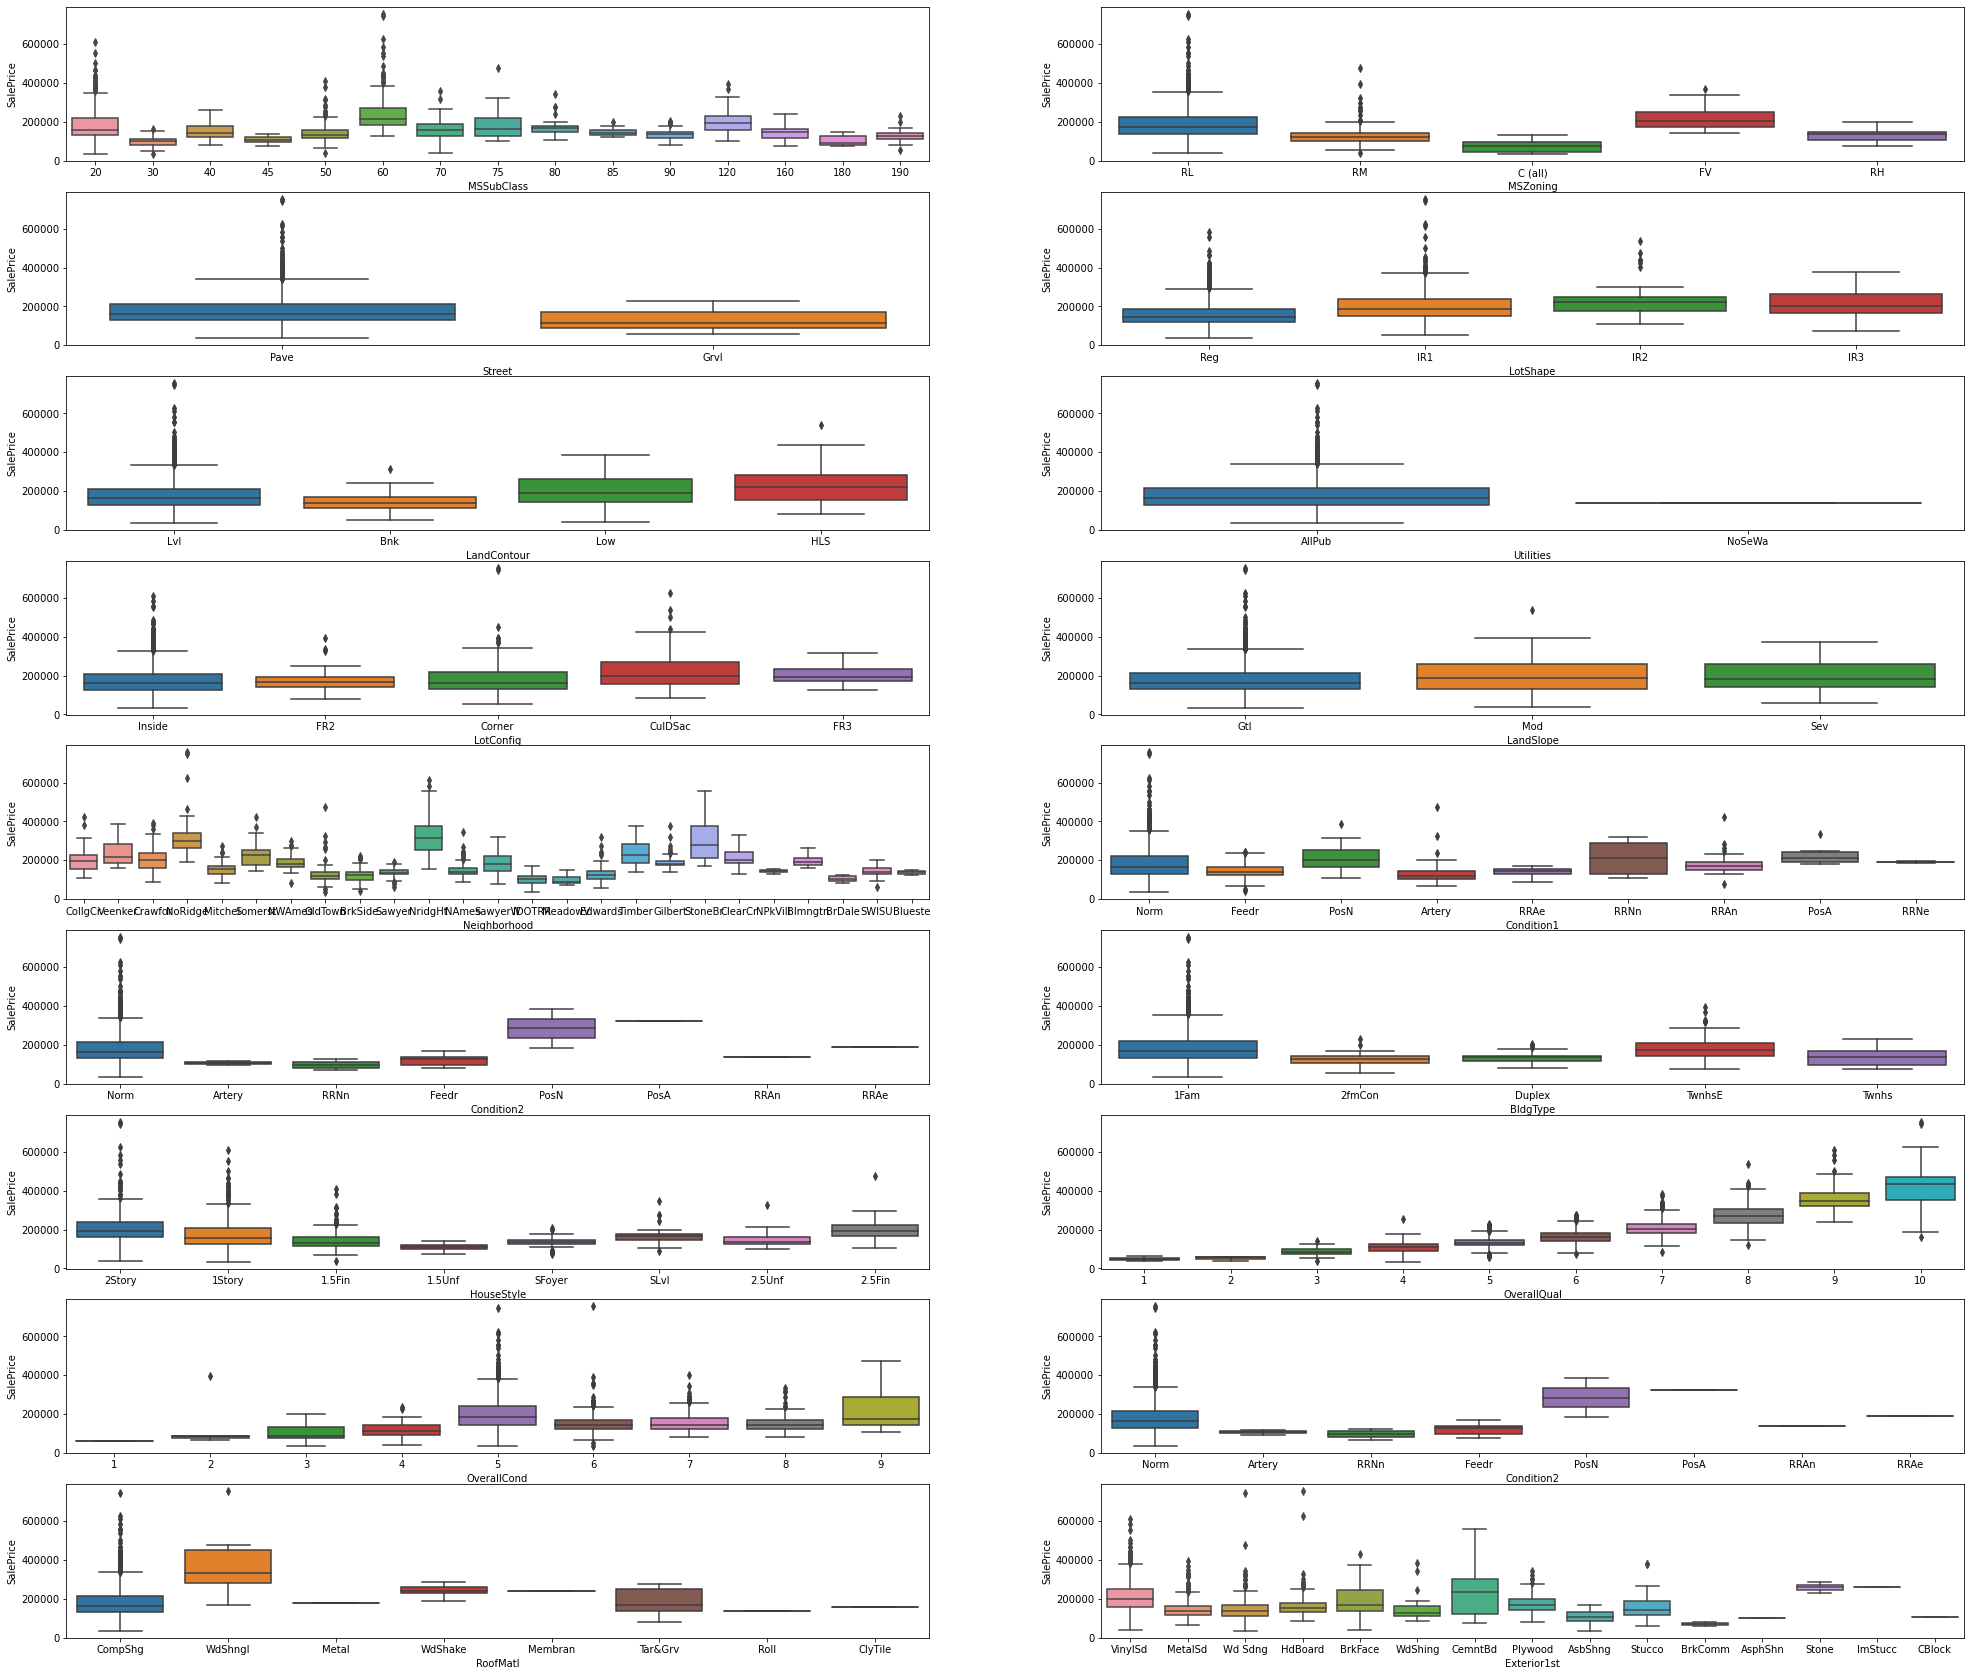

In [176]:
plt.figure(figsize=(34,30))
plt.subplot(9,2,1)
sns.boxplot(data=train_df,x='MSSubClass' ,y='SalePrice' )
plt.subplot(9,2,2)
sns.boxplot(data=train_df,x='MSZoning' ,y='SalePrice' )
plt.subplot(9,2,3)
sns.boxplot(data=train_df,x='Street' ,y='SalePrice' )
plt.subplot(9,2,4)
sns.boxplot(data=train_df,x='LotShape' ,y='SalePrice' )
plt.subplot(9,2,5)
sns.boxplot(data=train_df,x='LandContour' ,y='SalePrice' )
plt.subplot(9,2,6)
sns.boxplot(data=train_df,x='Utilities' ,y='SalePrice' )
plt.subplot(9,2,7)
sns.boxplot(data=train_df,x='LotConfig' ,y='SalePrice' )
plt.subplot(9,2,8)
sns.boxplot(data=train_df,x='LandSlope' ,y='SalePrice' )
plt.subplot(9,2,9)
sns.boxplot(data=train_df,x='Neighborhood' ,y='SalePrice' )
plt.subplot(9,2,10)
sns.boxplot(data=train_df,x='Condition1' ,y='SalePrice' )
plt.subplot(9,2,11)
sns.boxplot(data=train_df,x='Condition2' ,y='SalePrice' )
plt.subplot(9,2,12)
sns.boxplot(data=train_df,x='BldgType' ,y='SalePrice' )
plt.subplot(9,2,13)
sns.boxplot(data=train_df,x='HouseStyle' ,y='SalePrice' )
plt.subplot(9,2,14)
sns.boxplot(data=train_df,x='OverallQual' ,y='SalePrice' )
plt.subplot(9,2,15)
sns.boxplot(data=train_df,x='OverallCond' ,y='SalePrice' )
plt.subplot(9,2,16)
sns.boxplot(data=train_df,x='Condition2' ,y='SalePrice' )
plt.subplot(9,2,17)
sns.boxplot(data=train_df,x='RoofMatl' ,y='SalePrice' )
plt.subplot(9,2,18)
sns.boxplot(data=train_df,x='Exterior1st' ,y='SalePrice' )

Observation :

       - Few variables have very large number of categories.
       - Creating dummies for all categories will cause the model complexity to increase massively
       - Creating the bins for all categorical variables depending on the percentage of      each category in a feature
       

#### Creating bins for following variables depending on the percentage of spread:
    MSSubClass
    Neighborhood
    Condition1
    Condition2
    HouseStyle
    OverallQual
    OverallCond
    RoofStylec
    RoofMatl
    Exterior1st
    Exterior2nd
    ExterQual
    ExterCond
    Foundation
    BsmtQual
    BsmtCond
    BsmtExposure
    BsmtFinType1
    BsmtFinType2
    Heating
    HeatingQC
    CentralAir
    Electrical
    KitchenQual
     FireplaceQu
    GarageType
    GarageFinish
    GarageQual
    GarageCond
    PavedDrive
    SaleType
    SaleCondition
    Fireplaces
    Functional


  Please note:  The categories whose total percentage is less than 10% of the dataset are grouped under 'others' 
    
    


In [177]:
print(train_df['MSSubClass'].value_counts()*100/len(train_df['MSSubClass']))
train_df["MSSubClass_grp"]= np.nan
train_df['MSSubClass_grp'].loc[train_df['MSSubClass'] == 20] = 'A' 
train_df['MSSubClass_grp'].loc[train_df['MSSubClass'] == 60] = 'B' 
train_df['MSSubClass_grp'].loc[train_df['MSSubClass'] == 50] = 'C' 
train_df['MSSubClass_grp'].loc[train_df['MSSubClass'] == 120] = 'D'
train_df['MSSubClass_grp'] = train_df['MSSubClass_grp'].replace({np.nan : 'E'})

train_df_MSSubClass= pd.get_dummies(train_df['MSSubClass_grp'] ,drop_first=True ,prefix='MSSubClass_grp',prefix_sep='_') 
train_df = pd.concat([train_df,train_df_MSSubClass],axis=1)
train_df= train_df.drop(['MSSubClass_grp' , 'MSSubClass'] ,axis=1)
train_df.head(5)


20     36.712329
60     20.479452
50      9.863014
120     5.958904
30      4.726027
160     4.315068
70      4.109589
80      3.972603
90      3.561644
190     2.054795
85      1.369863
75      1.095890
45      0.821918
180     0.684932
40      0.273973
Name: MSSubClass, dtype: float64


,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,totalAge_months,monthage_TillRenovation,monthage_AfterRenovation,MSSubClass_grp_B,MSSubClass_grp_C,MSSubClass_grp_D,MSSubClass_grp_E
0,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,WD,Normal,208500,70,0,70,1,0,0,0
1,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,WD,Normal,181500,379,0,379,0,0,0,0
2,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,WD,Normal,223500,87,12,75,1,0,0,0
3,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,WD,Abnorml,140000,1102,660,442,0,0,0,1
4,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,WD,Normal,250000,96,0,96,1,0,0,0


In [178]:
print(train_df['MSZoning'].value_counts()*100/len(train_df['MSZoning']))

train_df_MSZoning= pd.get_dummies(train_df['MSZoning'] ,drop_first=True ,prefix='MSZoning',prefix_sep='_') 
train_df = pd.concat([train_df,train_df_MSZoning],axis=1)
train_df= train_df.drop('MSZoning' ,axis=1)
train_df.head(5)

RL         78.835616
RM         14.931507
FV          4.452055
RH          1.095890
C (all)     0.684932
Name: MSZoning, dtype: float64


,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,totalAge_months,monthage_TillRenovation,monthage_AfterRenovation,MSSubClass_grp_B,MSSubClass_grp_C,MSSubClass_grp_D,MSSubClass_grp_E,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,WD,Normal,208500,70,0,70,1,0,0,0,0,0,1,0
1,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,WD,Normal,181500,379,0,379,0,0,0,0,0,0,1,0
2,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,WD,Normal,223500,87,12,75,1,0,0,0,0,0,1,0
3,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,WD,Abnorml,140000,1102,660,442,0,0,0,1,0,0,1,0
4,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,WD,Normal,250000,96,0,96,1,0,0,0,0,0,1,0


In [179]:
print(train_df['Street'].value_counts()*100/len(train_df['Street']))
train_df_Street= pd.get_dummies(train_df['Street'] ,drop_first=True,prefix='Street',prefix_sep='_') 
train_df = pd.concat([train_df,train_df_Street],axis=1)
train_df= train_df.drop('Street' ,axis=1)
train_df.head(5)

Pave    99.589041
Grvl     0.410959
Name: Street, dtype: float64


,LotFrontage,LotArea,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,totalAge_months,monthage_TillRenovation,monthage_AfterRenovation,MSSubClass_grp_B,MSSubClass_grp_C,MSSubClass_grp_D,MSSubClass_grp_E,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave
0,65.0,8450,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,WD,Normal,208500,70,0,70,1,0,0,0,0,0,1,0,1
1,80.0,9600,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,WD,Normal,181500,379,0,379,0,0,0,0,0,0,1,0,1
2,68.0,11250,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,WD,Normal,223500,87,12,75,1,0,0,0,0,0,1,0,1
3,60.0,9550,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,WD,Abnorml,140000,1102,660,442,0,0,0,1,0,0,1,0,1
4,84.0,14260,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,WD,Normal,250000,96,0,96,1,0,0,0,0,0,1,0,1


In [180]:
print(train_df['LotShape'].value_counts()*100/len(train_df['LotShape']))
train_df_LotShape= pd.get_dummies(train_df['LotShape'] ,drop_first=True,prefix='LotShape',prefix_sep='_') 
train_df = pd.concat([train_df,train_df_LotShape],axis=1)
train_df= train_df.drop('LotShape' ,axis=1)
train_df.head(5)

Reg    63.356164
IR1    33.150685
IR2     2.808219
IR3     0.684932
Name: LotShape, dtype: float64


,LotFrontage,LotArea,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,totalAge_months,monthage_TillRenovation,monthage_AfterRenovation,MSSubClass_grp_B,MSSubClass_grp_C,MSSubClass_grp_D,MSSubClass_grp_E,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg
0,65.0,8450,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,WD,Normal,208500,70,0,70,1,0,0,0,0,0,1,0,1,0,0,1
1,80.0,9600,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,WD,Normal,181500,379,0,379,0,0,0,0,0,0,1,0,1,0,0,1
2,68.0,11250,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,WD,Normal,223500,87,12,75,1,0,0,0,0,0,1,0,1,0,0,0
3,60.0,9550,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,WD,Abnorml,140000,1102,660,442,0,0,0,1,0,0,1,0,1,0,0,0
4,84.0,14260,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,WD,Normal,250000,96,0,96,1,0,0,0,0,0,1,0,1,0,0,0


In [181]:
print(train_df['LandContour'].value_counts()*100/len(train_df['LandContour']))

train_df_LandContour= pd.get_dummies(train_df['LandContour'] ,drop_first=True,prefix='LandContour',prefix_sep='_') 
train_df = pd.concat([train_df,train_df_LandContour],axis=1)
train_df= train_df.drop('LandContour' ,axis=1)
train_df.head(5)

Lvl    89.794521
Bnk     4.315068
HLS     3.424658
Low     2.465753
Name: LandContour, dtype: float64


,LotFrontage,LotArea,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,totalAge_months,monthage_TillRenovation,monthage_AfterRenovation,MSSubClass_grp_B,MSSubClass_grp_C,MSSubClass_grp_D,MSSubClass_grp_E,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl
0,65.0,8450,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,WD,Normal,208500,70,0,70,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1
1,80.0,9600,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,WD,Normal,181500,379,0,379,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1
2,68.0,11250,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,WD,Normal,223500,87,12,75,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1
3,60.0,9550,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,WD,Abnorml,140000,1102,660,442,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1
4,84.0,14260,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,WD,Normal,250000,96,0,96,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1


In [182]:
print(train_df['Utilities'].value_counts()*100/len(train_df['Utilities']))

train_df_Utilities= pd.get_dummies(train_df['Utilities'] ,drop_first=True,prefix='Utilities',prefix_sep='_') 
train_df = pd.concat([train_df,train_df_Utilities],axis=1)
train_df= train_df.drop('Utilities' ,axis=1)
train_df.head(5)

AllPub    99.931507
NoSeWa     0.068493
Name: Utilities, dtype: float64


,LotFrontage,LotArea,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,totalAge_months,monthage_TillRenovation,monthage_AfterRenovation,MSSubClass_grp_B,MSSubClass_grp_C,MSSubClass_grp_D,MSSubClass_grp_E,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa
0,65.0,8450,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,WD,Normal,208500,70,0,70,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0
1,80.0,9600,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,WD,Normal,181500,379,0,379,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0
2,68.0,11250,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,WD,Normal,223500,87,12,75,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0
3,60.0,9550,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,WD,Abnorml,140000,1102,660,442,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0
4,84.0,14260,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,WD,Normal,250000,96,0,96,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0


In [183]:
print(train_df['LotConfig'].value_counts()*100/len(train_df['LotConfig']))

train_df_LotConfig= pd.get_dummies(train_df['LotConfig'] ,drop_first=True,prefix='LotConfig',prefix_sep='_') 
train_df = pd.concat([train_df,train_df_LotConfig],axis=1)
train_df= train_df.drop('LotConfig' ,axis=1)
train_df.head(5)

Inside     72.054795
Corner     18.013699
CulDSac     6.438356
FR2         3.219178
FR3         0.273973
Name: LotConfig, dtype: float64


,LotFrontage,LotArea,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,totalAge_months,monthage_TillRenovation,monthage_AfterRenovation,MSSubClass_grp_B,MSSubClass_grp_C,MSSubClass_grp_D,MSSubClass_grp_E,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside
0,65.0,8450,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,WD,Normal,208500,70,0,70,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1
1,80.0,9600,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,WD,Normal,181500,379,0,379,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0
2,68.0,11250,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,WD,Normal,223500,87,12,75,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1
3,60.0,9550,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,WD,Abnorml,140000,1102,660,442,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,WD,Normal,250000,96,0,96,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0


In [184]:
print(train_df['LandSlope'].value_counts()*100/len(train_df['LandSlope']))

train_df_LandSlope= pd.get_dummies(train_df['LandSlope'] ,drop_first=True,prefix='LandSlope',prefix_sep='_') 
train_df = pd.concat([train_df,train_df_LandSlope],axis=1)
train_df= train_df.drop('LandSlope' ,axis=1)
train_df.head(5)

Gtl    94.657534
Mod     4.452055
Sev     0.890411
Name: LandSlope, dtype: float64


,LotFrontage,LotArea,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,totalAge_months,monthage_TillRenovation,monthage_AfterRenovation,MSSubClass_grp_B,MSSubClass_grp_C,MSSubClass_grp_D,MSSubClass_grp_E,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev
0,65.0,8450,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,WD,Normal,208500,70,0,70,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0
1,80.0,9600,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,WD,Normal,181500,379,0,379,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0
2,68.0,11250,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,WD,Normal,223500,87,12,75,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
3,60.0,9550,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,WD,Abnorml,140000,1102,660,442,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,84.0,14260,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,WD,Normal,250000,96,0,96,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0


In [185]:
print(train_df['Neighborhood'].value_counts()*100/len(train_df))
train_df['Neighborhood_grp'] = np.nan
train_df['Neighborhood_grp'][train_df['Neighborhood']=='NAmes' ] = 'A'
train_df['Neighborhood_grp'][train_df['Neighborhood']=='CollgCr' ] = 'B'
train_df['Neighborhood_grp'][train_df['Neighborhood']=='OldTown' ] = 'C'
train_df['Neighborhood_grp'][train_df['Neighborhood']=='Edwards' ] = 'D'
train_df['Neighborhood_grp'][train_df['Neighborhood']=='Somerst' ] = 'E'
train_df['Neighborhood_grp'][train_df['Neighborhood']=='Gilbert' ] = 'F'
train_df['Neighborhood_grp'][train_df['Neighborhood']=='NridgHt' ] = 'G'
train_df['Neighborhood_grp'][train_df['Neighborhood']=='Sawyer' ] = 'H'
train_df['Neighborhood_grp'][train_df['Neighborhood']=='NWAmes' ] = 'I'
train_df['Neighborhood_grp'][train_df['Neighborhood']=='SawyerW' ] = 'J'
train_df['Neighborhood_grp'] = train_df['Neighborhood_grp'].replace({np.nan : 'K'})
train_df_Neighborhood= pd.get_dummies(train_df['Neighborhood_grp'] ,drop_first=True,prefix='Neighborhood_grp',prefix_sep='_') 
train_df = pd.concat([train_df,train_df_Neighborhood],axis=1)
train_df= train_df.drop(['Neighborhood','Neighborhood_grp'] ,axis=1)
train_df.head(5)
     

NAmes      15.410959
CollgCr    10.273973
OldTown     7.739726
Edwards     6.849315
Somerst     5.890411
Gilbert     5.410959
NridgHt     5.273973
Sawyer      5.068493
NWAmes      5.000000
SawyerW     4.041096
BrkSide     3.972603
Crawfor     3.493151
Mitchel     3.356164
NoRidge     2.808219
Timber      2.602740
IDOTRR      2.534247
ClearCr     1.917808
SWISU       1.712329
StoneBr     1.712329
MeadowV     1.164384
Blmngtn     1.164384
BrDale      1.095890
Veenker     0.753425
NPkVill     0.616438
Blueste     0.136986
Name: Neighborhood, dtype: float64


,LotFrontage,LotArea,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,totalAge_months,monthage_TillRenovation,monthage_AfterRenovation,MSSubClass_grp_B,MSSubClass_grp_C,MSSubClass_grp_D,MSSubClass_grp_E,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_grp_B,Neighborhood_grp_C,Neighborhood_grp_D,Neighborhood_grp_E,Neighborhood_grp_F,Neighborhood_grp_G,Neighborhood_grp_H,Neighborhood_grp_I,Neighborhood_grp_J,Neighborhood_grp_K
0,65.0,8450,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,WD,Normal,208500,70,0,70,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
1,80.0,9600,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,WD,Normal,181500,379,0,379,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,68.0,11250,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,WD,Normal,223500,87,12,75,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3,60.0,9550,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,WD,Abnorml,140000,1102,660,442,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,84.0,14260,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,WD,Normal,250000,96,0,96,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [186]:
print(train_df['Condition1'].value_counts()*100/len(train_df))
train_df['Condition1_grp'] = np.nan
train_df['Condition1_grp'][train_df['Condition1']=='Norm' ] = 'A'
train_df['Condition1_grp'][train_df['Condition1']=='Feedr' ] = 'B'
train_df['Condition1_grp'][train_df['Condition1']=='Artery' ] = 'C'
train_df['Condition1_grp'][train_df['Condition1']=='RRAn' ] = 'D'
train_df['Condition1_grp'] = train_df['Condition1_grp'].replace({np.nan : 'E'})
train_df_Condition1= pd.get_dummies(train_df['Condition1_grp'] ,drop_first=True,prefix='Condition1_grp',prefix_sep='_') 
train_df = pd.concat([train_df,train_df_Condition1],axis=1)
train_df= train_df.drop(['Condition1_grp','Condition1'] ,axis=1)
train_df.head(5)
     

Norm      86.301370
Feedr      5.547945
Artery     3.287671
RRAn       1.780822
PosN       1.301370
RRAe       0.753425
PosA       0.547945
RRNn       0.342466
RRNe       0.136986
Name: Condition1, dtype: float64


,LotFrontage,LotArea,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,totalAge_months,monthage_TillRenovation,monthage_AfterRenovation,MSSubClass_grp_B,MSSubClass_grp_C,MSSubClass_grp_D,MSSubClass_grp_E,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_grp_B,Neighborhood_grp_C,Neighborhood_grp_D,Neighborhood_grp_E,Neighborhood_grp_F,Neighborhood_grp_G,Neighborhood_grp_H,Neighborhood_grp_I,Neighborhood_grp_J,Neighborhood_grp_K,Condition1_grp_B,Condition1_grp_C,Condition1_grp_D,Condition1_grp_E
0,65.0,8450,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,WD,Normal,208500,70,0,70,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,80.0,9600,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,WD,Normal,181500,379,0,379,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
2,68.0,11250,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,WD,Normal,223500,87,12,75,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,60.0,9550,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,WD,Abnorml,140000,1102,660,442,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,84.0,14260,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,WD,Normal,250000,96,0,96,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [187]:
print(train_df['Condition2'].value_counts()*100/len(train_df))
train_df['Condition2_grp'] = np.nan
train_df['Condition2_grp'][train_df['Condition2']=='Norm' ] = 'A'
train_df['Condition2_grp'][train_df['Condition2']=='Feedr' ] = 'B'
train_df['Condition2_grp'] = train_df['Condition2_grp'].replace({np.nan : 'C'})
train_df_Condition2= pd.get_dummies(train_df['Condition2_grp'] ,drop_first=True,prefix='Condition2_grp',prefix_sep='_') 
train_df = pd.concat([train_df,train_df_Condition2],axis=1)
train_df= train_df.drop(['Condition2_grp','Condition2'] ,axis=1)
train_df.head(5)     

Norm      98.972603
Feedr      0.410959
PosN       0.136986
RRNn       0.136986
Artery     0.136986
PosA       0.068493
RRAe       0.068493
RRAn       0.068493
Name: Condition2, dtype: float64


,LotFrontage,LotArea,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,totalAge_months,monthage_TillRenovation,monthage_AfterRenovation,MSSubClass_grp_B,MSSubClass_grp_C,MSSubClass_grp_D,MSSubClass_grp_E,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_grp_B,Neighborhood_grp_C,Neighborhood_grp_D,Neighborhood_grp_E,Neighborhood_grp_F,Neighborhood_grp_G,Neighborhood_grp_H,Neighborhood_grp_I,Neighborhood_grp_J,Neighborhood_grp_K,Condition1_grp_B,Condition1_grp_C,Condition1_grp_D,Condition1_grp_E,Condition2_grp_B,Condition2_grp_C
0,65.0,8450,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,WD,Normal,208500,70,0,70,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,80.0,9600,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,WD,Normal,181500,379,0,379,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
2,68.0,11250,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,WD,Normal,223500,87,12,75,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,60.0,9550,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,WD,Abnorml,140000,1102,660,442,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,84.0,14260,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,WD,Normal,250000,96,0,96,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [188]:
print(train_df['BldgType'].value_counts()*100/len(train_df))

train_df_BldgType= pd.get_dummies(train_df['BldgType'] ,drop_first=True,prefix='BldgType',prefix_sep='_') 
train_df = pd.concat([train_df,train_df_BldgType],axis=1)
train_df= train_df.drop('BldgType' ,axis=1)
train_df.head(5)

1Fam      83.561644
TwnhsE     7.808219
Duplex     3.561644
Twnhs      2.945205
2fmCon     2.123288
Name: BldgType, dtype: float64


,LotFrontage,LotArea,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,totalAge_months,monthage_TillRenovation,monthage_AfterRenovation,MSSubClass_grp_B,MSSubClass_grp_C,MSSubClass_grp_D,MSSubClass_grp_E,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_grp_B,Neighborhood_grp_C,Neighborhood_grp_D,Neighborhood_grp_E,Neighborhood_grp_F,Neighborhood_grp_G,Neighborhood_grp_H,Neighborhood_grp_I,Neighborhood_grp_J,Neighborhood_grp_K,Condition1_grp_B,Condition1_grp_C,Condition1_grp_D,Condition1_grp_E,Condition2_grp_B,Condition2_grp_C,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE
0,65.0,8450,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,WD,Normal,208500,70,0,70,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,80.0,9600,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,WD,Normal,181500,379,0,379,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
2,68.0,11250,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,WD,Normal,223500,87,12,75,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,60.0,9550,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,WD,Abnorml,140000,1102,660,442,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,84.0,14260,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,WD,Normal,250000,96,0,96,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [189]:
print(train_df['HouseStyle'].value_counts()*100/len(train_df))
train_df['HouseStyle_grp'] = np.nan
train_df['HouseStyle_grp'][train_df['HouseStyle']=='1Story' ] = 'A'
train_df['HouseStyle_grp'][train_df['HouseStyle']=='2Story' ] = 'B'
train_df['HouseStyle_grp'][train_df['HouseStyle']=='1.5Fin' ] = 'C'
train_df['HouseStyle_grp'] = train_df['HouseStyle_grp'].replace({np.nan : 'D'})
train_df_HouseStyle= pd.get_dummies(train_df['HouseStyle_grp'] ,drop_first=True,prefix='HouseStyle_grp',prefix_sep='_') 
train_df = pd.concat([train_df,train_df_HouseStyle],axis=1)
train_df= train_df.drop(['HouseStyle_grp','HouseStyle'] ,axis=1)
train_df.head(5)
     

1Story    49.726027
2Story    30.479452
1.5Fin    10.547945
SLvl       4.452055
SFoyer     2.534247
1.5Unf     0.958904
2.5Unf     0.753425
2.5Fin     0.547945
Name: HouseStyle, dtype: float64


,LotFrontage,LotArea,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,totalAge_months,monthage_TillRenovation,monthage_AfterRenovation,MSSubClass_grp_B,MSSubClass_grp_C,MSSubClass_grp_D,MSSubClass_grp_E,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_grp_B,Neighborhood_grp_C,Neighborhood_grp_D,Neighborhood_grp_E,Neighborhood_grp_F,Neighborhood_grp_G,Neighborhood_grp_H,Neighborhood_grp_I,Neighborhood_grp_J,Neighborhood_grp_K,Condition1_grp_B,Condition1_grp_C,Condition1_grp_D,Condition1_grp_E,Condition2_grp_B,Condition2_grp_C,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_grp_B,HouseStyle_grp_C,HouseStyle_grp_D
0,65.0,8450,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,WD,Normal,208500,70,0,70,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,80.0,9600,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,WD,Normal,181500,379,0,379,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,68.0,11250,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,WD,Normal,223500,87,12,75,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,60.0,9550,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,WD,Abnorml,140000,1102,660,442,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,84.0,14260,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,WD,Normal,250000,96,0,96,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [190]:
print(train_df['OverallQual'].value_counts()*100/len(train_df))

train_df['OverallQual_grp'] = np.nan
train_df['OverallQual_grp'][(train_df['OverallQual']==5 )|(train_df['OverallQual']==6 )  ] = 'A'
train_df['OverallQual_grp'][(train_df['OverallQual']==7 )|(train_df['OverallQual']==8 )  ] = 'B'
train_df['OverallQual_grp'][(train_df['OverallQual']==4 )|(train_df['OverallQual']==9 )  ] = 'C'
train_df['OverallQual_grp'] = train_df['OverallQual_grp'].replace({np.nan : 'D'})
train_df_OverallQual= pd.get_dummies(train_df['OverallQual_grp'] ,drop_first=True,prefix='OverallQual_grp',prefix_sep='_') 
train_df = pd.concat([train_df,train_df_OverallQual],axis=1)
train_df= train_df.drop(['OverallQual','OverallQual_grp'] ,axis=1)
train_df.head(5)     

5     27.191781
6     25.616438
7     21.849315
8     11.506849
4      7.945205
9      2.945205
3      1.369863
10     1.232877
2      0.205479
1      0.136986
Name: OverallQual, dtype: float64


,LotFrontage,LotArea,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,totalAge_months,monthage_TillRenovation,monthage_AfterRenovation,MSSubClass_grp_B,MSSubClass_grp_C,MSSubClass_grp_D,MSSubClass_grp_E,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_grp_B,Neighborhood_grp_C,Neighborhood_grp_D,Neighborhood_grp_E,Neighborhood_grp_F,Neighborhood_grp_G,Neighborhood_grp_H,Neighborhood_grp_I,Neighborhood_grp_J,Neighborhood_grp_K,Condition1_grp_B,Condition1_grp_C,Condition1_grp_D,Condition1_grp_E,Condition2_grp_B,Condition2_grp_C,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_grp_B,HouseStyle_grp_C,HouseStyle_grp_D,OverallQual_grp_B,OverallQual_grp_C,OverallQual_grp_D
0,65.0,8450,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,WD,Normal,208500,70,0,70,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,80.0,9600,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,WD,Normal,181500,379,0,379,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,68.0,11250,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,WD,Normal,223500,87,12,75,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,60.0,9550,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,WD,Abnorml,140000,1102,660,442,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,84.0,14260,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,WD,Normal,250000,96,0,96,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [191]:
print(train_df['OverallCond'].value_counts()*100/len(train_df))

train_df['OverallCond_grp'] = np.nan
train_df['OverallCond_grp'][(train_df['OverallCond']==5 )|(train_df['OverallCond']==6 )  ] = 'A'
train_df['OverallCond_grp'][(train_df['OverallCond']==7 )|(train_df['OverallCond']==8 )  ] = 'B'
train_df['OverallCond_grp'] = train_df['OverallCond_grp'].replace({np.nan : 'C'})
train_df_OverallCond= pd.get_dummies(train_df['OverallCond_grp'] ,drop_first=True,prefix='OverallCond_grp',prefix_sep='_') 
train_df = pd.concat([train_df,train_df_OverallCond],axis=1)
train_df= train_df.drop(['OverallCond','OverallCond_grp'] ,axis=1)
train_df.head(5)     

5    56.232877
6    17.260274
7    14.041096
8     4.931507
4     3.904110
3     1.712329
9     1.506849
2     0.342466
1     0.068493
Name: OverallCond, dtype: float64


,LotFrontage,LotArea,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,totalAge_months,monthage_TillRenovation,monthage_AfterRenovation,MSSubClass_grp_B,MSSubClass_grp_C,MSSubClass_grp_D,MSSubClass_grp_E,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_grp_B,Neighborhood_grp_C,Neighborhood_grp_D,Neighborhood_grp_E,Neighborhood_grp_F,Neighborhood_grp_G,Neighborhood_grp_H,Neighborhood_grp_I,Neighborhood_grp_J,Neighborhood_grp_K,Condition1_grp_B,Condition1_grp_C,Condition1_grp_D,Condition1_grp_E,Condition2_grp_B,Condition2_grp_C,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_grp_B,HouseStyle_grp_C,HouseStyle_grp_D,OverallQual_grp_B,OverallQual_grp_C,OverallQual_grp_D,OverallCond_grp_B,OverallCond_grp_C
0,65.0,8450,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,WD,Normal,208500,70,0,70,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,80.0,9600,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,WD,Normal,181500,379,0,379,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,68.0,11250,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,WD,Normal,223500,87,12,75,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,60.0,9550,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,WD,Abnorml,140000,1102,660,442,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4,84.0,14260,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,WD,Normal,250000,96,0,96,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [192]:
print(train_df['RoofStyle'].value_counts()*100/len(train_df))
train_df['RoofStyle_grp'] = np.nan
train_df['RoofStyle_grp'][train_df['RoofStyle']== 'Gable' ] = 'A'
train_df['RoofStyle_grp'][train_df['RoofStyle']== 'Hip' ] = ''
train_df['RoofStyle_grp'] = train_df['RoofStyle_grp'].replace({np.nan : 'C'})
train_df_RoofStyle= pd.get_dummies(train_df['RoofStyle_grp'] ,drop_first=True,prefix='RoofStyle_grp',prefix_sep='_') 
train_df = pd.concat([train_df,train_df_RoofStyle],axis=1)
train_df= train_df.drop(['RoofStyle','RoofStyle_grp'] ,axis=1)
train_df.head(5)     

Gable      78.150685
Hip        19.589041
Flat        0.890411
Gambrel     0.753425
Mansard     0.479452
Shed        0.136986
Name: RoofStyle, dtype: float64


,LotFrontage,LotArea,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,totalAge_months,monthage_TillRenovation,monthage_AfterRenovation,MSSubClass_grp_B,MSSubClass_grp_C,MSSubClass_grp_D,MSSubClass_grp_E,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_grp_B,Neighborhood_grp_C,Neighborhood_grp_D,Neighborhood_grp_E,Neighborhood_grp_F,Neighborhood_grp_G,Neighborhood_grp_H,Neighborhood_grp_I,Neighborhood_grp_J,Neighborhood_grp_K,Condition1_grp_B,Condition1_grp_C,Condition1_grp_D,Condition1_grp_E,Condition2_grp_B,Condition2_grp_C,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_grp_B,HouseStyle_grp_C,HouseStyle_grp_D,OverallQual_grp_B,OverallQual_grp_C,OverallQual_grp_D,OverallCond_grp_B,OverallCond_grp_C,RoofStyle_grp_A,RoofStyle_grp_C
0,65.0,8450,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,WD,Normal,208500,70,0,70,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
1,80.0,9600,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,WD,Normal,181500,379,0,379,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,68.0,11250,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,WD,Normal,223500,87,12,75,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
3,60.0,9550,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,WD,Abnorml,140000,1102,660,442,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
4,84.0,14260,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,WD,Normal,250000,96,0,96,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0


In [193]:
train_df['RoofMatl'].value_counts()*100/len(train_df['RoofMatl'])
train_df['RoofMatl_grp'] = np.nan
train_df['RoofMatl_grp'][train_df['RoofMatl']== 'CompShg' ] = 'CompShg'
train_df['RoofMatl_grp'] = train_df['RoofMatl_grp'].replace({np.nan : 'others'})
train_df_RoofMatl= pd.get_dummies(train_df['RoofMatl_grp'] ,drop_first=True,prefix='RoofMatl_grp',prefix_sep='_') 
train_df = pd.concat([train_df,train_df_RoofMatl],axis=1)
train_df= train_df.drop(['RoofMatl','RoofMatl_grp'] ,axis=1)
train_df.head(5)     

,LotFrontage,LotArea,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,totalAge_months,monthage_TillRenovation,monthage_AfterRenovation,MSSubClass_grp_B,MSSubClass_grp_C,MSSubClass_grp_D,MSSubClass_grp_E,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_grp_B,Neighborhood_grp_C,Neighborhood_grp_D,Neighborhood_grp_E,Neighborhood_grp_F,Neighborhood_grp_G,Neighborhood_grp_H,Neighborhood_grp_I,Neighborhood_grp_J,Neighborhood_grp_K,Condition1_grp_B,Condition1_grp_C,Condition1_grp_D,Condition1_grp_E,Condition2_grp_B,Condition2_grp_C,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_grp_B,HouseStyle_grp_C,HouseStyle_grp_D,OverallQual_grp_B,OverallQual_grp_C,OverallQual_grp_D,OverallCond_grp_B,OverallCond_grp_C,RoofStyle_grp_A,RoofStyle_grp_C,RoofMatl_grp_others
0,65.0,8450,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,WD,Normal,208500,70,0,70,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0
1,80.0,9600,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,WD,Normal,181500,379,0,379,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
2,68.0,11250,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,WD,Normal,223500,87,12,75,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0
3,60.0,9550,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,WD,Abnorml,140000,1102,660,442,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0
4,84.0,14260,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,WD,Normal,250000,96,0,96,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0


In [194]:
print(train_df['Exterior1st'].value_counts()*100/len(train_df['Exterior1st']))
train_df['Exterior1st_grp'] = np.nan
train_df['Exterior1st_grp'][train_df['Exterior1st']== 'VinylSd' ] = 'VinylSd'
train_df['Exterior1st_grp'][train_df['Exterior1st']== 'HdBoard' ] = 'HdBoard'
train_df['Exterior1st_grp'][train_df['Exterior1st']== 'MetalSd' ] = 'MetalSd'
train_df['Exterior1st_grp'][train_df['Exterior1st']== 'Wd Sdng' ] = 'WdSdng'
train_df['Exterior1st_grp'][train_df['Exterior1st']== 'Plywood' ] = 'Plywood'
train_df['Exterior1st_grp'] = train_df['Exterior1st_grp'].replace({np.nan : 'others'})
      
train_df_Exterior1st= pd.get_dummies(train_df['Exterior1st_grp'] ,drop_first=True,prefix='Exterior1st_grp',prefix_sep='_') 
train_df = pd.concat([train_df,train_df_Exterior1st],axis=1)
train_df= train_df.drop(['Exterior1st_grp','Exterior1st' ] ,axis=1)
 
train_df.head(5)

VinylSd    35.273973
HdBoard    15.205479
MetalSd    15.068493
Wd Sdng    14.109589
Plywood     7.397260
CemntBd     4.178082
BrkFace     3.424658
WdShing     1.780822
Stucco      1.712329
AsbShng     1.369863
Stone       0.136986
BrkComm     0.136986
AsphShn     0.068493
ImStucc     0.068493
CBlock      0.068493
Name: Exterior1st, dtype: float64


,LotFrontage,LotArea,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,totalAge_months,monthage_TillRenovation,monthage_AfterRenovation,MSSubClass_grp_B,MSSubClass_grp_C,MSSubClass_grp_D,MSSubClass_grp_E,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_grp_B,Neighborhood_grp_C,Neighborhood_grp_D,Neighborhood_grp_E,Neighborhood_grp_F,Neighborhood_grp_G,Neighborhood_grp_H,Neighborhood_grp_I,Neighborhood_grp_J,Neighborhood_grp_K,Condition1_grp_B,Condition1_grp_C,Condition1_grp_D,Condition1_grp_E,Condition2_grp_B,Condition2_grp_C,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_grp_B,HouseStyle_grp_C,HouseStyle_grp_D,OverallQual_grp_B,OverallQual_grp_C,OverallQual_grp_D,OverallCond_grp_B,OverallCond_grp_C,RoofStyle_grp_A,RoofStyle_grp_C,RoofMatl_grp_others,Exterior1st_grp_MetalSd,Exterior1st_grp_Plywood,Exterior1st_grp_VinylSd,Exterior1st_grp_WdSdng,Exterior1st_grp_others
0,65.0,8450,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,WD,Normal,208500,70,0,70,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
1,80.0,9600,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,WD,Normal,181500,379,0,379,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0
2,68.0,11250,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,WD,Normal,223500,87,12,75,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
3,60.0,9550,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,WD,Abnorml,140000,1102,660,442,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
4,84.0,14260,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,WD,Normal,250000,96,0,96,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0


In [195]:
train_df['Exterior2nd'].value_counts()*100/len(train_df['Exterior2nd'])
train_df['Exterior2nd_grp'] = np.nan
train_df['Exterior2nd_grp'][train_df['Exterior2nd']== 'VinylSd' ] = 'VinylSd'
train_df['Exterior2nd_grp'][train_df['Exterior2nd']== 'HdBoard' ] = 'HdBoard'
train_df['Exterior2nd_grp'][train_df['Exterior2nd']== 'MetalSd' ] = 'MetalSd'
train_df['Exterior2nd_grp'][train_df['Exterior2nd']== 'Wd Sdng' ] = 'WdSdng'
train_df['Exterior2nd_grp'][train_df['Exterior2nd']== 'Plywood' ] = 'Plywood'
train_df['Exterior2nd_grp'] = train_df['Exterior2nd_grp'].replace({np.nan : 'others'})
      
train_df_Exterior2nd= pd.get_dummies(train_df['Exterior2nd_grp'] ,drop_first=True,prefix='Exterior2nd_grp',prefix_sep='_') 
train_df = pd.concat([train_df,train_df_Exterior2nd],axis=1)
train_df= train_df.drop(['Exterior2nd_grp','Exterior2nd'] ,axis=1)
train_df.head(5)

,LotFrontage,LotArea,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,totalAge_months,monthage_TillRenovation,monthage_AfterRenovation,MSSubClass_grp_B,MSSubClass_grp_C,MSSubClass_grp_D,MSSubClass_grp_E,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_grp_B,Neighborhood_grp_C,Neighborhood_grp_D,Neighborhood_grp_E,Neighborhood_grp_F,Neighborhood_grp_G,Neighborhood_grp_H,Neighborhood_grp_I,Neighborhood_grp_J,Neighborhood_grp_K,Condition1_grp_B,Condition1_grp_C,Condition1_grp_D,Condition1_grp_E,Condition2_grp_B,Condition2_grp_C,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_grp_B,HouseStyle_grp_C,HouseStyle_grp_D,OverallQual_grp_B,OverallQual_grp_C,OverallQual_grp_D,OverallCond_grp_B,OverallCond_grp_C,RoofStyle_grp_A,RoofStyle_grp_C,RoofMatl_grp_others,Exterior1st_grp_MetalSd,Exterior1st_grp_Plywood,Exterior1st_grp_VinylSd,Exterior1st_grp_WdSdng,Exterior1st_grp_others,Exterior2nd_grp_MetalSd,Exterior2nd_grp_Plywood,Exterior2nd_grp_VinylSd,Exterior2nd_grp_WdSdng,Exterior2nd_grp_others
0,65.0,8450,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,WD,Normal,208500,70,0,70,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
1,80.0,9600,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,WD,Normal,181500,379,0,379,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0
2,68.0,11250,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,WD,Normal,223500,87,12,75,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
3,60.0,9550,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,WD,Abnorml,140000,1102,660,442,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
4,84.0,14260,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,WD,Normal,250000,96,0,96,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0


In [196]:
train_df_MasVnrType= pd.get_dummies(train_df['MasVnrType'] ,drop_first=True,prefix='MasVnrType',prefix_sep='_') 
train_df = pd.concat([train_df,train_df_MasVnrType],axis=1)
train_df= train_df.drop(['MasVnrType'] ,axis=1)
train_df.head(5)

,LotFrontage,LotArea,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,totalAge_months,monthage_TillRenovation,monthage_AfterRenovation,MSSubClass_grp_B,MSSubClass_grp_C,MSSubClass_grp_D,MSSubClass_grp_E,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_grp_B,Neighborhood_grp_C,Neighborhood_grp_D,Neighborhood_grp_E,Neighborhood_grp_F,Neighborhood_grp_G,Neighborhood_grp_H,Neighborhood_grp_I,Neighborhood_grp_J,Neighborhood_grp_K,Condition1_grp_B,Condition1_grp_C,Condition1_grp_D,Condition1_grp_E,Condition2_grp_B,Condition2_grp_C,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_grp_B,HouseStyle_grp_C,HouseStyle_grp_D,OverallQual_grp_B,OverallQual_grp_C,OverallQual_grp_D,OverallCond_grp_B,OverallCond_grp_C,RoofStyle_grp_A,RoofStyle_grp_C,RoofMatl_grp_others,Exterior1st_grp_MetalSd,Exterior1st_grp_Plywood,Exterior1st_grp_VinylSd,Exterior1st_grp_WdSdng,Exterior1st_grp_others,Exterior2nd_grp_MetalSd,Exterior2nd_grp_Plywood,Exterior2nd_grp_VinylSd,Exterior2nd_grp_WdSdng,Exterior2nd_grp_others,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone
0,65.0,8450,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,WD,Normal,208500,70,0,70,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
1,80.0,9600,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,WD,Normal,181500,379,0,379,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
2,68.0,11250,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,WD,Normal,223500,87,12,75,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
3,60.0,9550,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,WD,Abnorml,140000,1102,660,442,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
4,84.0,14260,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,WD,Normal,250000,96,0,96,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0


In [197]:
print(train_df['ExterQual'].value_counts()*100/len(train_df['ExterQual']))
train_df['ExterQual_grp'] = np.nan
train_df['ExterQual_grp'][train_df['ExterQual']== 'TA' ] = 'TA'
train_df['ExterQual_grp'][train_df['ExterQual']== 'Gd' ] = 'Gd'
train_df['ExterQual_grp'] = train_df['ExterQual_grp'].replace({np.nan : 'others'})
      
train_df_ExterQual= pd.get_dummies(train_df['ExterQual_grp'] ,drop_first=True,prefix='ExterQual_grp',prefix_sep='_') 
train_df = pd.concat([train_df,train_df_ExterQual],axis=1)
train_df= train_df.drop(['ExterQual_grp','ExterQual'] ,axis=1)
train_df.head(5)

TA    62.054795
Gd    33.424658
Ex     3.561644
Fa     0.958904
Name: ExterQual, dtype: float64


,LotFrontage,LotArea,MasVnrArea,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,totalAge_months,monthage_TillRenovation,monthage_AfterRenovation,MSSubClass_grp_B,MSSubClass_grp_C,MSSubClass_grp_D,MSSubClass_grp_E,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_grp_B,Neighborhood_grp_C,Neighborhood_grp_D,Neighborhood_grp_E,Neighborhood_grp_F,Neighborhood_grp_G,Neighborhood_grp_H,Neighborhood_grp_I,Neighborhood_grp_J,Neighborhood_grp_K,Condition1_grp_B,Condition1_grp_C,Condition1_grp_D,Condition1_grp_E,Condition2_grp_B,Condition2_grp_C,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_grp_B,HouseStyle_grp_C,HouseStyle_grp_D,OverallQual_grp_B,OverallQual_grp_C,OverallQual_grp_D,OverallCond_grp_B,OverallCond_grp_C,RoofStyle_grp_A,RoofStyle_grp_C,RoofMatl_grp_others,Exterior1st_grp_MetalSd,Exterior1st_grp_Plywood,Exterior1st_grp_VinylSd,Exterior1st_grp_WdSdng,Exterior1st_grp_others,Exterior2nd_grp_MetalSd,Exterior2nd_grp_Plywood,Exterior2nd_grp_VinylSd,Exterior2nd_grp_WdSdng,Exterior2nd_grp_others,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_grp_TA,ExterQual_grp_others
0,65.0,8450,196.0,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,WD,Normal,208500,70,0,70,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
1,80.0,9600,0.0,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,WD,Normal,181500,379,0,379,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0
2,68.0,11250,162.0,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,WD,Normal,223500,87,12,75,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
3,60.0,9550,0.0,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,WD,Abnorml,140000,1102,660,442,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0
4,84.0,14260,350.0,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,WD,Normal,250000,96,0,96,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0


In [198]:
print(train_df['ExterCond'].value_counts()*100/len(train_df['ExterCond']))
train_df['ExterCond_grp'] = np.nan
train_df['ExterCond_grp'][train_df['ExterCond']== 'TA' ] = 'TA'
train_df['ExterCond_grp'][train_df['ExterCond']== 'Gd' ] = 'Gd'
train_df['ExterCond_grp'] = train_df['ExterCond_grp'].replace({np.nan : 'others'})
      
train_df_ExterCond= pd.get_dummies(train_df['ExterCond_grp'] ,drop_first=True,prefix='ExterCond_grp',prefix_sep='_') 
train_df = pd.concat([train_df,train_df_ExterCond],axis=1)
train_df= train_df.drop(['ExterCond_grp','ExterCond'] ,axis=1)
train_df.head(5)

TA    87.808219
Gd    10.000000
Fa     1.917808
Ex     0.205479
Po     0.068493
Name: ExterCond, dtype: float64


,LotFrontage,LotArea,MasVnrArea,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,totalAge_months,monthage_TillRenovation,monthage_AfterRenovation,MSSubClass_grp_B,MSSubClass_grp_C,MSSubClass_grp_D,MSSubClass_grp_E,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_grp_B,Neighborhood_grp_C,Neighborhood_grp_D,Neighborhood_grp_E,Neighborhood_grp_F,Neighborhood_grp_G,Neighborhood_grp_H,Neighborhood_grp_I,Neighborhood_grp_J,Neighborhood_grp_K,Condition1_grp_B,Condition1_grp_C,Condition1_grp_D,Condition1_grp_E,Condition2_grp_B,Condition2_grp_C,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_grp_B,HouseStyle_grp_C,HouseStyle_grp_D,OverallQual_grp_B,OverallQual_grp_C,OverallQual_grp_D,OverallCond_grp_B,OverallCond_grp_C,RoofStyle_grp_A,RoofStyle_grp_C,RoofMatl_grp_others,Exterior1st_grp_MetalSd,Exterior1st_grp_Plywood,Exterior1st_grp_VinylSd,Exterior1st_grp_WdSdng,Exterior1st_grp_others,Exterior2nd_grp_MetalSd,Exterior2nd_grp_Plywood,Exterior2nd_grp_VinylSd,Exterior2nd_grp_WdSdng,Exterior2nd_grp_others,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_grp_TA,ExterQual_grp_others,ExterCond_grp_TA,ExterCond_grp_others
0,65.0,8450,196.0,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,WD,Normal,208500,70,0,70,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0
1,80.0,9600,0.0,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,WD,Normal,181500,379,0,379,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0
2,68.0,11250,162.0,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,WD,Normal,223500,87,12,75,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0
3,60.0,9550,0.0,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,WD,Abnorml,140000,1102,660,442,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0
4,84.0,14260,350.0,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,WD,Normal,250000,96,0,96,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0


In [199]:
print(train_df['Foundation'].value_counts()*100/len(train_df['Foundation']))

train_df['Foundation_grp'] = np.nan
train_df['Foundation_grp'][train_df['Foundation']== 'PConc' ] = 'PConc'
train_df['Foundation_grp'][train_df['Foundation']== 'CBlock' ] = 'CBlock'
train_df['Foundation_grp'][train_df['Foundation']== 'BrkTil' ] = 'BrkTil'
train_df['Foundation_grp'] = train_df['Foundation_grp'].replace({np.nan : 'others'})
      
train_df_Foundation= pd.get_dummies(train_df['Foundation_grp'] ,drop_first=True,prefix='Foundation_grp',prefix_sep='_') 
train_df = pd.concat([train_df,train_df_Foundation],axis=1)
train_df= train_df.drop(['Foundation_grp','Foundation'] ,axis=1)
train_df.head(5)

PConc     44.315068
CBlock    43.424658
BrkTil    10.000000
Slab       1.643836
Stone      0.410959
Wood       0.205479
Name: Foundation, dtype: float64


,LotFrontage,LotArea,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,totalAge_months,monthage_TillRenovation,monthage_AfterRenovation,MSSubClass_grp_B,MSSubClass_grp_C,MSSubClass_grp_D,MSSubClass_grp_E,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_grp_B,Neighborhood_grp_C,Neighborhood_grp_D,Neighborhood_grp_E,Neighborhood_grp_F,Neighborhood_grp_G,Neighborhood_grp_H,Neighborhood_grp_I,Neighborhood_grp_J,Neighborhood_grp_K,Condition1_grp_B,Condition1_grp_C,Condition1_grp_D,Condition1_grp_E,Condition2_grp_B,Condition2_grp_C,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_grp_B,HouseStyle_grp_C,HouseStyle_grp_D,OverallQual_grp_B,OverallQual_grp_C,OverallQual_grp_D,OverallCond_grp_B,OverallCond_grp_C,RoofStyle_grp_A,RoofStyle_grp_C,RoofMatl_grp_others,Exterior1st_grp_MetalSd,Exterior1st_grp_Plywood,Exterior1st_grp_VinylSd,Exterior1st_grp_WdSdng,Exterior1st_grp_others,Exterior2nd_grp_MetalSd,Exterior2nd_grp_Plywood,Exterior2nd_grp_VinylSd,Exterior2nd_grp_WdSdng,Exterior2nd_grp_others,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_grp_TA,ExterQual_grp_others,ExterCond_grp_TA,ExterCond_grp_others,Foundation_grp_CBlock,Foundation_grp_PConc,Foundation_grp_others
0,65.0,8450,196.0,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,WD,Normal,208500,70,0,70,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
1,80.0,9600,0.0,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,WD,Normal,181500,379,0,379,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0
2,68.0,11250,162.0,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,WD,Normal,223500,87,12,75,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
3,60.0,9550,0.0,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,WD,Abnorml,140000,1102,660,442,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0
4,84.0,14260,350.0,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,WD,Normal,250000,96,0,96,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0


In [200]:
print(train_df['BsmtQual'].value_counts()*100/len(train_df['BsmtQual']))

train_df['BsmtQual_grp'] = np.nan
train_df['BsmtQual_grp'][train_df['BsmtQual']== 'TA' ] = 'TA'
train_df['BsmtQual_grp'][train_df['BsmtQual']== 'Gd' ] = 'Gd'
train_df['BsmtQual_grp'] = train_df['BsmtQual_grp'].replace({np.nan : 'others'})
      
train_df_BsmtQual= pd.get_dummies(train_df['BsmtQual_grp'] ,drop_first=True,prefix='BsmtQual_grp',prefix_sep='_') 
train_df = pd.concat([train_df,train_df_BsmtQual],axis=1)
train_df= train_df.drop(['BsmtQual_grp','BsmtQual'] ,axis=1)
train_df.head(5)

TA      44.452055
Gd      42.328767
Ex       8.287671
None     2.534247
Fa       2.397260
Name: BsmtQual, dtype: float64


,LotFrontage,LotArea,MasVnrArea,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,totalAge_months,monthage_TillRenovation,monthage_AfterRenovation,MSSubClass_grp_B,MSSubClass_grp_C,MSSubClass_grp_D,MSSubClass_grp_E,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_grp_B,Neighborhood_grp_C,Neighborhood_grp_D,Neighborhood_grp_E,Neighborhood_grp_F,Neighborhood_grp_G,Neighborhood_grp_H,Neighborhood_grp_I,Neighborhood_grp_J,Neighborhood_grp_K,Condition1_grp_B,Condition1_grp_C,Condition1_grp_D,Condition1_grp_E,Condition2_grp_B,Condition2_grp_C,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_grp_B,HouseStyle_grp_C,HouseStyle_grp_D,OverallQual_grp_B,OverallQual_grp_C,OverallQual_grp_D,OverallCond_grp_B,OverallCond_grp_C,RoofStyle_grp_A,RoofStyle_grp_C,RoofMatl_grp_others,Exterior1st_grp_MetalSd,Exterior1st_grp_Plywood,Exterior1st_grp_VinylSd,Exterior1st_grp_WdSdng,Exterior1st_grp_others,Exterior2nd_grp_MetalSd,Exterior2nd_grp_Plywood,Exterior2nd_grp_VinylSd,Exterior2nd_grp_WdSdng,Exterior2nd_grp_others,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_grp_TA,ExterQual_grp_others,ExterCond_grp_TA,ExterCond_grp_others,Foundation_grp_CBlock,Foundation_grp_PConc,Foundation_grp_others,BsmtQual_grp_TA,BsmtQual_grp_others
0,65.0,8450,196.0,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,WD,Normal,208500,70,0,70,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0
1,80.0,9600,0.0,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,WD,Normal,181500,379,0,379,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0
2,68.0,11250,162.0,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,WD,Normal,223500,87,12,75,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0
3,60.0,9550,0.0,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,WD,Abnorml,140000,1102,660,442,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0
4,84.0,14260,350.0,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,WD,Normal,250000,96,0,96,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0


In [201]:
print(train_df['BsmtCond'].value_counts()*100/len(train_df['BsmtCond']))

train_df['BsmtCond_grp'] = np.nan
train_df['BsmtCond_grp'][train_df['BsmtCond']== 'TA' ] = 'TA'
train_df['BsmtCond_grp'][train_df['BsmtCond']== 'Gd' ] = 'Gd'
train_df['BsmtCond_grp'] = train_df['BsmtCond_grp'].replace({np.nan : 'others'})
      
train_df_BsmtCond= pd.get_dummies(train_df['BsmtCond_grp'] ,drop_first=True,prefix='BsmtCond_grp',prefix_sep='_') 
train_df = pd.concat([train_df,train_df_BsmtCond],axis=1)
train_df= train_df.drop(['BsmtCond_grp','BsmtCond'] ,axis=1)
train_df.head(5)

TA      89.794521
Gd       4.452055
Fa       3.082192
None     2.534247
Po       0.136986
Name: BsmtCond, dtype: float64


,LotFrontage,LotArea,MasVnrArea,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,totalAge_months,monthage_TillRenovation,monthage_AfterRenovation,MSSubClass_grp_B,MSSubClass_grp_C,MSSubClass_grp_D,MSSubClass_grp_E,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_grp_B,Neighborhood_grp_C,Neighborhood_grp_D,Neighborhood_grp_E,Neighborhood_grp_F,Neighborhood_grp_G,Neighborhood_grp_H,Neighborhood_grp_I,Neighborhood_grp_J,Neighborhood_grp_K,Condition1_grp_B,Condition1_grp_C,Condition1_grp_D,Condition1_grp_E,Condition2_grp_B,Condition2_grp_C,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_grp_B,HouseStyle_grp_C,HouseStyle_grp_D,OverallQual_grp_B,OverallQual_grp_C,OverallQual_grp_D,OverallCond_grp_B,OverallCond_grp_C,RoofStyle_grp_A,RoofStyle_grp_C,RoofMatl_grp_others,Exterior1st_grp_MetalSd,Exterior1st_grp_Plywood,Exterior1st_grp_VinylSd,Exterior1st_grp_WdSdng,Exterior1st_grp_others,Exterior2nd_grp_MetalSd,Exterior2nd_grp_Plywood,Exterior2nd_grp_VinylSd,Exterior2nd_grp_WdSdng,Exterior2nd_grp_others,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_grp_TA,ExterQual_grp_others,ExterCond_grp_TA,ExterCond_grp_others,Foundation_grp_CBlock,Foundation_grp_PConc,Foundation_grp_others,BsmtQual_grp_TA,BsmtQual_grp_others,BsmtCond_grp_TA,BsmtCond_grp_others
0,65.0,8450,196.0,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,WD,Normal,208500,70,0,70,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0
1,80.0,9600,0.0,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,WD,Normal,181500,379,0,379,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0
2,68.0,11250,162.0,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,WD,Normal,223500,87,12,75,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0
3,60.0,9550,0.0,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,WD,Abnorml,140000,1102,660,442,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0
4,84.0,14260,350.0,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,WD,Normal,250000,96,0,96,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0


In [202]:
print(train_df['BsmtExposure'].value_counts()*100/len(train_df['BsmtExposure']))

train_df['BsmtExposure_grp'] = np.nan
train_df['BsmtExposure_grp'][train_df['BsmtExposure']== 'No' ] = 'No'
train_df['BsmtExposure_grp'][train_df['BsmtExposure']== 'Av' ] = 'Av'
train_df['BsmtExposure_grp'][train_df['BsmtExposure']== 'Gd' ] = 'Gd'
train_df['BsmtExposure_grp'] = train_df['BsmtExposure_grp'].replace({np.nan : 'others'})
      
train_df_BsmtExposure= pd.get_dummies(train_df['BsmtExposure_grp'] ,drop_first=True,prefix='BsmtExposure_grp',prefix_sep='_') 
train_df = pd.concat([train_df,train_df_BsmtExposure],axis=1)
train_df= train_df.drop(['BsmtExposure_grp','BsmtExposure'] ,axis=1)
train_df.head(5)

No      65.273973
Av      15.136986
Gd       9.178082
Mn       7.808219
None     2.602740
Name: BsmtExposure, dtype: float64


,LotFrontage,LotArea,MasVnrArea,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,totalAge_months,monthage_TillRenovation,monthage_AfterRenovation,MSSubClass_grp_B,MSSubClass_grp_C,MSSubClass_grp_D,MSSubClass_grp_E,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_grp_B,Neighborhood_grp_C,Neighborhood_grp_D,Neighborhood_grp_E,Neighborhood_grp_F,Neighborhood_grp_G,Neighborhood_grp_H,Neighborhood_grp_I,Neighborhood_grp_J,Neighborhood_grp_K,Condition1_grp_B,Condition1_grp_C,Condition1_grp_D,Condition1_grp_E,Condition2_grp_B,Condition2_grp_C,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_grp_B,HouseStyle_grp_C,HouseStyle_grp_D,OverallQual_grp_B,OverallQual_grp_C,OverallQual_grp_D,OverallCond_grp_B,OverallCond_grp_C,RoofStyle_grp_A,RoofStyle_grp_C,RoofMatl_grp_others,Exterior1st_grp_MetalSd,Exterior1st_grp_Plywood,Exterior1st_grp_VinylSd,Exterior1st_grp_WdSdng,Exterior1st_grp_others,Exterior2nd_grp_MetalSd,Exterior2nd_grp_Plywood,Exterior2nd_grp_VinylSd,Exterior2nd_grp_WdSdng,Exterior2nd_grp_others,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_grp_TA,ExterQual_grp_others,ExterCond_grp_TA,ExterCond_grp_others,Foundation_grp_CBlock,Foundation_grp_PConc,Foundation_grp_others,BsmtQual_grp_TA,BsmtQual_grp_others,BsmtCond_grp_TA,BsmtCond_grp_others,BsmtExposure_grp_Gd,BsmtExposure_grp_No,BsmtExposure_grp_others
0,65.0,8450,196.0,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,WD,Normal,208500,70,0,70,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,80.0,9600,0.0,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,WD,Normal,181500,379,0,379,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0
2,68.0,11250,162.0,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,WD,Normal,223500,87,12,75,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,60.0,9550,0.0,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,WD,Abnorml,140000,1102,660,442,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0
4,84.0,14260,350.0,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,WD,Normal,250000,96,0,96,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0


In [203]:
print(train_df['BsmtFinType1'].value_counts()*100/len(train_df['BsmtFinType1']))

train_df['BsmtFinType1_grp'] = np.nan
train_df['BsmtFinType1_grp'][train_df['BsmtFinType1']== 'Unf' ] = 'Unf'
train_df['BsmtFinType1_grp'][train_df['BsmtFinType1']== 'GLQ' ] = 'GLQ'
train_df['BsmtFinType1_grp'][train_df['BsmtFinType1']== 'ALQ' ] = 'ALQ'
train_df['BsmtFinType1_grp'][train_df['BsmtFinType1']== 'BLQ' ] = 'BLQ'
train_df['BsmtFinType1_grp'] = train_df['BsmtFinType1_grp'].replace({np.nan : 'others'})
      
train_df_BsmtFinType1= pd.get_dummies(train_df['BsmtFinType1_grp'] ,drop_first=True,prefix='BsmtFinType1_grp',prefix_sep='_') 
train_df = pd.concat([train_df,train_df_BsmtFinType1],axis=1)
train_df= train_df.drop(['BsmtFinType1_grp','BsmtFinType1'] ,axis=1)
train_df.head(5)

Unf     29.452055
GLQ     28.630137
ALQ     15.068493
BLQ     10.136986
Rec      9.109589
LwQ      5.068493
None     2.534247
Name: BsmtFinType1, dtype: float64


,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,totalAge_months,monthage_TillRenovation,monthage_AfterRenovation,MSSubClass_grp_B,MSSubClass_grp_C,MSSubClass_grp_D,MSSubClass_grp_E,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_grp_B,Neighborhood_grp_C,Neighborhood_grp_D,Neighborhood_grp_E,Neighborhood_grp_F,Neighborhood_grp_G,Neighborhood_grp_H,Neighborhood_grp_I,Neighborhood_grp_J,Neighborhood_grp_K,Condition1_grp_B,Condition1_grp_C,Condition1_grp_D,Condition1_grp_E,Condition2_grp_B,Condition2_grp_C,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_grp_B,HouseStyle_grp_C,HouseStyle_grp_D,OverallQual_grp_B,OverallQual_grp_C,OverallQual_grp_D,OverallCond_grp_B,OverallCond_grp_C,RoofStyle_grp_A,RoofStyle_grp_C,RoofMatl_grp_others,Exterior1st_grp_MetalSd,Exterior1st_grp_Plywood,Exterior1st_grp_VinylSd,Exterior1st_grp_WdSdng,Exterior1st_grp_others,Exterior2nd_grp_MetalSd,Exterior2nd_grp_Plywood,Exterior2nd_grp_VinylSd,Exterior2nd_grp_WdSdng,Exterior2nd_grp_others,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_grp_TA,ExterQual_grp_others,ExterCond_grp_TA,ExterCond_grp_others,Foundation_grp_CBlock,Foundation_grp_PConc,Foundation_grp_others,BsmtQual_grp_TA,BsmtQual_grp_others,BsmtCond_grp_TA,BsmtCond_grp_others,BsmtExposure_grp_Gd,BsmtExposure_grp_No,BsmtExposure_grp_others,BsmtFinType1_grp_BLQ,BsmtFinType1_grp_GLQ,BsmtFinType1_grp_Unf,BsmtFinType1_grp_others
0,65.0,8450,196.0,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,WD,Normal,208500,70,0,70,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0
1,80.0,9600,0.0,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,WD,Normal,181500,379,0,379,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0
2,68.0,11250,162.0,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,WD,Normal,223500,87,12,75,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0
3,60.0,9550,0.0,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,WD,Abnorml,140000,1102,660,442,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,350.0,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,WD,Normal,250000,96,0,96,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0


In [204]:
print(train_df['BsmtFinType2'].value_counts()*100/len(train_df['BsmtFinType2']))

train_df['BsmtFinType2_grp'] = np.nan
train_df['BsmtFinType2_grp'][train_df['BsmtFinType2']== 'Unf' ] = 'Unf'
train_df['BsmtFinType2_grp'][train_df['BsmtFinType2']== 'Rec' ] = 'Rec'

train_df['BsmtFinType2_grp'] = train_df['BsmtFinType2_grp'].replace({np.nan : 'others'})
      
train_df_BsmtFinType2= pd.get_dummies(train_df['BsmtFinType2_grp'] ,drop_first=True,prefix='BsmtFinType2_grp',prefix_sep='_') 
train_df = pd.concat([train_df,train_df_BsmtFinType2],axis=1)
train_df= train_df.drop(['BsmtFinType2_grp','BsmtFinType2'] ,axis=1)
train_df.head(5)

Unf     86.027397
Rec      3.698630
LwQ      3.150685
None     2.602740
BLQ      2.260274
ALQ      1.301370
GLQ      0.958904
Name: BsmtFinType2, dtype: float64


,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,totalAge_months,monthage_TillRenovation,monthage_AfterRenovation,MSSubClass_grp_B,MSSubClass_grp_C,MSSubClass_grp_D,MSSubClass_grp_E,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_grp_B,Neighborhood_grp_C,Neighborhood_grp_D,Neighborhood_grp_E,Neighborhood_grp_F,Neighborhood_grp_G,Neighborhood_grp_H,Neighborhood_grp_I,Neighborhood_grp_J,Neighborhood_grp_K,Condition1_grp_B,Condition1_grp_C,Condition1_grp_D,Condition1_grp_E,Condition2_grp_B,Condition2_grp_C,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_grp_B,HouseStyle_grp_C,HouseStyle_grp_D,OverallQual_grp_B,OverallQual_grp_C,OverallQual_grp_D,OverallCond_grp_B,OverallCond_grp_C,RoofStyle_grp_A,RoofStyle_grp_C,RoofMatl_grp_others,Exterior1st_grp_MetalSd,Exterior1st_grp_Plywood,Exterior1st_grp_VinylSd,Exterior1st_grp_WdSdng,Exterior1st_grp_others,Exterior2nd_grp_MetalSd,Exterior2nd_grp_Plywood,Exterior2nd_grp_VinylSd,Exterior2nd_grp_WdSdng,Exterior2nd_grp_others,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_grp_TA,ExterQual_grp_others,ExterCond_grp_TA,ExterCond_grp_others,Foundation_grp_CBlock,Foundation_grp_PConc,Foundation_grp_others,BsmtQual_grp_TA,BsmtQual_grp_others,BsmtCond_grp_TA,BsmtCond_grp_others,BsmtExposure_grp_Gd,BsmtExposure_grp_No,BsmtExposure_grp_others,BsmtFinType1_grp_BLQ,BsmtFinType1_grp_GLQ,BsmtFinType1_grp_Unf,BsmtFinType1_grp_others,BsmtFinType2_grp_Unf,BsmtFinType2_grp_others
0,65.0,8450,196.0,706,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,WD,Normal,208500,70,0,70,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0
1,80.0,9600,0.0,978,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,WD,Normal,181500,379,0,379,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0
2,68.0,11250,162.0,486,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,WD,Normal,223500,87,12,75,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0
3,60.0,9550,0.0,216,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,WD,Abnorml,140000,1102,660,442,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
4,84.0,14260,350.0,655,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,WD,Normal,250000,96,0,96,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0


In [205]:
print(train_df['Heating'].value_counts()*100/len(train_df['Heating']))

train_df['Heating_grp'] = np.nan
train_df['Heating_grp'][train_df['Heating']== 'GasA' ] = 'GasA'
train_df['Heating_grp'] = train_df['Heating_grp'].replace({np.nan : 'others'})
      
train_df_Heating= pd.get_dummies(train_df['Heating_grp'] ,drop_first=True,prefix='Heating_grp',prefix_sep='_') 
train_df = pd.concat([train_df,train_df_Heating],axis=1)
train_df= train_df.drop(['Heating_grp','Heating'] ,axis=1)
train_df.head(5)

GasA     97.808219
GasW      1.232877
Grav      0.479452
Wall      0.273973
OthW      0.136986
Floor     0.068493
Name: Heating, dtype: float64


,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,totalAge_months,monthage_TillRenovation,monthage_AfterRenovation,MSSubClass_grp_B,MSSubClass_grp_C,MSSubClass_grp_D,MSSubClass_grp_E,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_grp_B,Neighborhood_grp_C,Neighborhood_grp_D,Neighborhood_grp_E,Neighborhood_grp_F,Neighborhood_grp_G,Neighborhood_grp_H,Neighborhood_grp_I,Neighborhood_grp_J,Neighborhood_grp_K,Condition1_grp_B,Condition1_grp_C,Condition1_grp_D,Condition1_grp_E,Condition2_grp_B,Condition2_grp_C,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_grp_B,HouseStyle_grp_C,HouseStyle_grp_D,OverallQual_grp_B,OverallQual_grp_C,OverallQual_grp_D,OverallCond_grp_B,OverallCond_grp_C,RoofStyle_grp_A,RoofStyle_grp_C,RoofMatl_grp_others,Exterior1st_grp_MetalSd,Exterior1st_grp_Plywood,Exterior1st_grp_VinylSd,Exterior1st_grp_WdSdng,Exterior1st_grp_others,Exterior2nd_grp_MetalSd,Exterior2nd_grp_Plywood,Exterior2nd_grp_VinylSd,Exterior2nd_grp_WdSdng,Exterior2nd_grp_others,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_grp_TA,ExterQual_grp_others,ExterCond_grp_TA,ExterCond_grp_others,Foundation_grp_CBlock,Foundation_grp_PConc,Foundation_grp_others,BsmtQual_grp_TA,BsmtQual_grp_others,BsmtCond_grp_TA,BsmtCond_grp_others,BsmtExposure_grp_Gd,BsmtExposure_grp_No,BsmtExposure_grp_others,BsmtFinType1_grp_BLQ,BsmtFinType1_grp_GLQ,BsmtFinType1_grp_Unf,BsmtFinType1_grp_others,BsmtFinType2_grp_Unf,BsmtFinType2_grp_others,Heating_grp_others
0,65.0,8450,196.0,706,0,150,856,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,WD,Normal,208500,70,0,70,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0
1,80.0,9600,0.0,978,0,284,1262,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,WD,Normal,181500,379,0,379,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0
2,68.0,11250,162.0,486,0,434,920,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,WD,Normal,223500,87,12,75,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0
3,60.0,9550,0.0,216,0,540,756,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,WD,Abnorml,140000,1102,660,442,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
4,84.0,14260,350.0,655,0,490,1145,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,WD,Normal,250000,96,0,96,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0


In [206]:
print(train_df['HeatingQC'].value_counts()*100/len(train_df['HeatingQC']))

train_df['HeatingQC_grp'] = np.nan
train_df['HeatingQC_grp'][train_df['HeatingQC']== 'Ex' ] = 'Ex'
train_df['HeatingQC_grp'][train_df['HeatingQC']== 'TA' ] = 'TA'
train_df['HeatingQC_grp'][train_df['HeatingQC']== 'Gd' ] = 'Gd'

train_df['HeatingQC_grp'] = train_df['HeatingQC_grp'].replace({np.nan : 'others'})
      
train_df_HeatingQC= pd.get_dummies(train_df['HeatingQC_grp'] ,drop_first=True,prefix='HeatingQC_grp',prefix_sep='_') 
train_df = pd.concat([train_df,train_df_HeatingQC],axis=1)
train_df= train_df.drop(['HeatingQC_grp','HeatingQC'] ,axis=1)
train_df.head(5)

Ex    50.753425
TA    29.315068
Gd    16.506849
Fa     3.356164
Po     0.068493
Name: HeatingQC, dtype: float64


,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,totalAge_months,monthage_TillRenovation,monthage_AfterRenovation,MSSubClass_grp_B,MSSubClass_grp_C,MSSubClass_grp_D,MSSubClass_grp_E,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_grp_B,Neighborhood_grp_C,Neighborhood_grp_D,Neighborhood_grp_E,Neighborhood_grp_F,Neighborhood_grp_G,Neighborhood_grp_H,Neighborhood_grp_I,Neighborhood_grp_J,Neighborhood_grp_K,Condition1_grp_B,Condition1_grp_C,Condition1_grp_D,Condition1_grp_E,Condition2_grp_B,Condition2_grp_C,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_grp_B,HouseStyle_grp_C,HouseStyle_grp_D,OverallQual_grp_B,OverallQual_grp_C,OverallQual_grp_D,OverallCond_grp_B,OverallCond_grp_C,RoofStyle_grp_A,RoofStyle_grp_C,RoofMatl_grp_others,Exterior1st_grp_MetalSd,Exterior1st_grp_Plywood,Exterior1st_grp_VinylSd,Exterior1st_grp_WdSdng,Exterior1st_grp_others,Exterior2nd_grp_MetalSd,Exterior2nd_grp_Plywood,Exterior2nd_grp_VinylSd,Exterior2nd_grp_WdSdng,Exterior2nd_grp_others,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_grp_TA,ExterQual_grp_others,ExterCond_grp_TA,ExterCond_grp_others,Foundation_grp_CBlock,Foundation_grp_PConc,Foundation_grp_others,BsmtQual_grp_TA,BsmtQual_grp_others,BsmtCond_grp_TA,BsmtCond_grp_others,BsmtExposure_grp_Gd,BsmtExposure_grp_No,BsmtExposure_grp_others,BsmtFinType1_grp_BLQ,BsmtFinType1_grp_GLQ,BsmtFinType1_grp_Unf,BsmtFinType1_grp_others,BsmtFinType2_grp_Unf,BsmtFinType2_grp_others,Heating_grp_others,HeatingQC_grp_Gd,HeatingQC_grp_TA,HeatingQC_grp_others
0,65.0,8450,196.0,706,0,150,856,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,WD,Normal,208500,70,0,70,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0
1,80.0,9600,0.0,978,0,284,1262,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,WD,Normal,181500,379,0,379,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,68.0,11250,162.0,486,0,434,920,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,WD,Normal,223500,87,12,75,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0
3,60.0,9550,0.0,216,0,540,756,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,WD,Abnorml,140000,1102,660,442,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
4,84.0,14260,350.0,655,0,490,1145,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,WD,Normal,250000,96,0,96,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0


In [207]:
print(train_df['CentralAir'].value_counts()*100/len(train_df['CentralAir']))

train_df['CentralAir_grp'] = np.nan
train_df['CentralAir_grp'][train_df['CentralAir']== 'Y' ] = 'Y'
train_df['CentralAir_grp'][train_df['CentralAir']== 'N' ] = 'N'
     
train_df_CentralAir= pd.get_dummies(train_df['CentralAir_grp'] ,drop_first=True,prefix='CentralAir_grp',prefix_sep='_') 
train_df = pd.concat([train_df,train_df_CentralAir],axis=1)
train_df= train_df.drop(['CentralAir_grp','CentralAir'] ,axis=1)
train_df.head(5)

Y    93.493151
N     6.506849
Name: CentralAir, dtype: float64


,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,totalAge_months,monthage_TillRenovation,monthage_AfterRenovation,MSSubClass_grp_B,MSSubClass_grp_C,MSSubClass_grp_D,MSSubClass_grp_E,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_grp_B,Neighborhood_grp_C,Neighborhood_grp_D,Neighborhood_grp_E,Neighborhood_grp_F,Neighborhood_grp_G,Neighborhood_grp_H,Neighborhood_grp_I,Neighborhood_grp_J,Neighborhood_grp_K,Condition1_grp_B,Condition1_grp_C,Condition1_grp_D,Condition1_grp_E,Condition2_grp_B,Condition2_grp_C,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_grp_B,HouseStyle_grp_C,HouseStyle_grp_D,OverallQual_grp_B,OverallQual_grp_C,OverallQual_grp_D,OverallCond_grp_B,OverallCond_grp_C,RoofStyle_grp_A,RoofStyle_grp_C,RoofMatl_grp_others,Exterior1st_grp_MetalSd,Exterior1st_grp_Plywood,Exterior1st_grp_VinylSd,Exterior1st_grp_WdSdng,Exterior1st_grp_others,Exterior2nd_grp_MetalSd,Exterior2nd_grp_Plywood,Exterior2nd_grp_VinylSd,Exterior2nd_grp_WdSdng,Exterior2nd_grp_others,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_grp_TA,ExterQual_grp_others,ExterCond_grp_TA,ExterCond_grp_others,Foundation_grp_CBlock,Foundation_grp_PConc,Foundation_grp_others,BsmtQual_grp_TA,BsmtQual_grp_others,BsmtCond_grp_TA,BsmtCond_grp_others,BsmtExposure_grp_Gd,BsmtExposure_grp_No,BsmtExposure_grp_others,BsmtFinType1_grp_BLQ,BsmtFinType1_grp_GLQ,BsmtFinType1_grp_Unf,BsmtFinType1_grp_others,BsmtFinType2_grp_Unf,BsmtFinType2_grp_others,Heating_grp_others,HeatingQC_grp_Gd,HeatingQC_grp_TA,HeatingQC_grp_others,CentralAir_grp_Y
0,65.0,8450,196.0,706,0,150,856,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,WD,Normal,208500,70,0,70,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
1,80.0,9600,0.0,978,0,284,1262,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,WD,Normal,181500,379,0,379,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
2,68.0,11250,162.0,486,0,434,920,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,WD,Normal,223500,87,12,75,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1
3,60.0,9550,0.0,216,0,540,756,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,WD,Abnorml,140000,1102,660,442,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1
4,84.0,14260,350.0,655,0,490,1145,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,WD,Normal,250000,96,0,96,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1


In [208]:
print(train_df['Electrical'].value_counts()*100/len(train_df['Electrical']))

train_df['Electrical_grp'] = np.nan
train_df['Electrical_grp'][train_df['Electrical']== 'SBrkr' ] = 'SBrkr'


train_df['Electrical_grp'] = train_df['Electrical_grp'].replace({np.nan : 'others'})
      
train_df_Electrical= pd.get_dummies(train_df['Electrical_grp'] ,drop_first=True,prefix='Electrical_grp',prefix_sep='_') 
train_df = pd.concat([train_df,train_df_Electrical],axis=1)
train_df= train_df.drop(['Electrical_grp','Electrical'] ,axis=1)
train_df.head(5)

SBrkr    91.438356
FuseA     6.438356
FuseF     1.849315
FuseP     0.205479
Mix       0.068493
Name: Electrical, dtype: float64


,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,totalAge_months,monthage_TillRenovation,monthage_AfterRenovation,MSSubClass_grp_B,MSSubClass_grp_C,MSSubClass_grp_D,MSSubClass_grp_E,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_grp_B,Neighborhood_grp_C,Neighborhood_grp_D,Neighborhood_grp_E,Neighborhood_grp_F,Neighborhood_grp_G,Neighborhood_grp_H,Neighborhood_grp_I,Neighborhood_grp_J,Neighborhood_grp_K,Condition1_grp_B,Condition1_grp_C,Condition1_grp_D,Condition1_grp_E,Condition2_grp_B,Condition2_grp_C,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_grp_B,HouseStyle_grp_C,HouseStyle_grp_D,OverallQual_grp_B,OverallQual_grp_C,OverallQual_grp_D,OverallCond_grp_B,OverallCond_grp_C,RoofStyle_grp_A,RoofStyle_grp_C,RoofMatl_grp_others,Exterior1st_grp_MetalSd,Exterior1st_grp_Plywood,Exterior1st_grp_VinylSd,Exterior1st_grp_WdSdng,Exterior1st_grp_others,Exterior2nd_grp_MetalSd,Exterior2nd_grp_Plywood,Exterior2nd_grp_VinylSd,Exterior2nd_grp_WdSdng,Exterior2nd_grp_others,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_grp_TA,ExterQual_grp_others,ExterCond_grp_TA,ExterCond_grp_others,Foundation_grp_CBlock,Foundation_grp_PConc,Foundation_grp_others,BsmtQual_grp_TA,BsmtQual_grp_others,BsmtCond_grp_TA,BsmtCond_grp_others,BsmtExposure_grp_Gd,BsmtExposure_grp_No,BsmtExposure_grp_others,BsmtFinType1_grp_BLQ,BsmtFinType1_grp_GLQ,BsmtFinType1_grp_Unf,BsmtFinType1_grp_others,BsmtFinType2_grp_Unf,BsmtFinType2_grp_others,Heating_grp_others,HeatingQC_grp_Gd,HeatingQC_grp_TA,HeatingQC_grp_others,CentralAir_grp_Y,Electrical_grp_others
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,WD,Normal,208500,70,0,70,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,WD,Normal,181500,379,0,379,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,WD,Normal,223500,87,12,75,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,WD,Abnorml,140000,1102,660,442,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,WD,Normal,250000,96,0,96,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0


In [209]:
print(train_df['KitchenQual'].value_counts()*100/len(train_df['KitchenQual']))

train_df['KitchenQual_grp'] = np.nan
train_df['KitchenQual_grp'][train_df['KitchenQual']== 'TA' ] = 'TA'
train_df['KitchenQual_grp'][train_df['KitchenQual']== 'Gd' ] = 'Gd'

train_df['KitchenQual_grp'] = train_df['KitchenQual_grp'].replace({np.nan : 'others'})
      
train_df_KitchenQual= pd.get_dummies(train_df['KitchenQual_grp'] ,drop_first=True,prefix='KitchenQual_grp',prefix_sep='_') 
train_df = pd.concat([train_df,train_df_KitchenQual],axis=1)
train_df= train_df.drop(['KitchenQual_grp','KitchenQual'] ,axis=1)
train_df.head(5)

TA    50.342466
Gd    40.136986
Ex     6.849315
Fa     2.671233
Name: KitchenQual, dtype: float64


,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,totalAge_months,monthage_TillRenovation,monthage_AfterRenovation,MSSubClass_grp_B,MSSubClass_grp_C,MSSubClass_grp_D,MSSubClass_grp_E,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_grp_B,Neighborhood_grp_C,Neighborhood_grp_D,Neighborhood_grp_E,Neighborhood_grp_F,Neighborhood_grp_G,Neighborhood_grp_H,Neighborhood_grp_I,Neighborhood_grp_J,Neighborhood_grp_K,Condition1_grp_B,Condition1_grp_C,Condition1_grp_D,Condition1_grp_E,Condition2_grp_B,Condition2_grp_C,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_grp_B,HouseStyle_grp_C,HouseStyle_grp_D,OverallQual_grp_B,OverallQual_grp_C,OverallQual_grp_D,OverallCond_grp_B,OverallCond_grp_C,RoofStyle_grp_A,RoofStyle_grp_C,RoofMatl_grp_others,Exterior1st_grp_MetalSd,Exterior1st_grp_Plywood,Exterior1st_grp_VinylSd,Exterior1st_grp_WdSdng,Exterior1st_grp_others,Exterior2nd_grp_MetalSd,Exterior2nd_grp_Plywood,Exterior2nd_grp_VinylSd,Exterior2nd_grp_WdSdng,Exterior2nd_grp_others,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_grp_TA,ExterQual_grp_others,ExterCond_grp_TA,ExterCond_grp_others,Foundation_grp_CBlock,Foundation_grp_PConc,Foundation_grp_others,BsmtQual_grp_TA,BsmtQual_grp_others,BsmtCond_grp_TA,BsmtCond_grp_others,BsmtExposure_grp_Gd,BsmtExposure_grp_No,BsmtExposure_grp_others,BsmtFinType1_grp_BLQ,BsmtFinType1_grp_GLQ,BsmtFinType1_grp_Unf,BsmtFinType1_grp_others,BsmtFinType2_grp_Unf,BsmtFinType2_grp_others,Heating_grp_others,HeatingQC_grp_Gd,HeatingQC_grp_TA,HeatingQC_grp_others,CentralAir_grp_Y,Electrical_grp_others,KitchenQual_grp_TA,KitchenQual_grp_others
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,Typ,0,None,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,WD,Normal,208500,70,0,70,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,WD,Normal,181500,379,0,379,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,WD,Normal,223500,87,12,75,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,WD,Abnorml,140000,1102,660,442,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,WD,Normal,250000,96,0,96,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0


In [210]:
print(train_df['FireplaceQu'].value_counts()*100/len(train_df['FireplaceQu']))

train_df['FireplaceQu_grp'] = np.nan
train_df['FireplaceQu_grp'][train_df['FireplaceQu']== 'None' ] = 'None'
train_df['FireplaceQu_grp'][train_df['FireplaceQu']== 'Gd' ] = 'Gd'
train_df['FireplaceQu_grp'][train_df['FireplaceQu']== 'TA' ] = 'TA'
train_df['FireplaceQu_grp'] = train_df['FireplaceQu_grp'].replace({np.nan : 'others'})
      
train_df_FireplaceQu= pd.get_dummies(train_df['FireplaceQu_grp'] ,drop_first=True,prefix='FireplaceQu_grp',prefix_sep='_') 
train_df = pd.concat([train_df,train_df_FireplaceQu],axis=1)
train_df= train_df.drop(['FireplaceQu_grp','FireplaceQu'] ,axis=1)
train_df.head(5)

None    47.260274
Gd      26.027397
TA      21.438356
Fa       2.260274
Ex       1.643836
Po       1.369863
Name: FireplaceQu, dtype: float64


,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,totalAge_months,monthage_TillRenovation,monthage_AfterRenovation,MSSubClass_grp_B,MSSubClass_grp_C,MSSubClass_grp_D,MSSubClass_grp_E,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_grp_B,Neighborhood_grp_C,Neighborhood_grp_D,Neighborhood_grp_E,Neighborhood_grp_F,Neighborhood_grp_G,Neighborhood_grp_H,Neighborhood_grp_I,Neighborhood_grp_J,Neighborhood_grp_K,Condition1_grp_B,Condition1_grp_C,Condition1_grp_D,Condition1_grp_E,Condition2_grp_B,Condition2_grp_C,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_grp_B,HouseStyle_grp_C,HouseStyle_grp_D,OverallQual_grp_B,OverallQual_grp_C,OverallQual_grp_D,OverallCond_grp_B,OverallCond_grp_C,RoofStyle_grp_A,RoofStyle_grp_C,RoofMatl_grp_others,Exterior1st_grp_MetalSd,Exterior1st_grp_Plywood,Exterior1st_grp_VinylSd,Exterior1st_grp_WdSdng,Exterior1st_grp_others,Exterior2nd_grp_MetalSd,Exterior2nd_grp_Plywood,Exterior2nd_grp_VinylSd,Exterior2nd_grp_WdSdng,Exterior2nd_grp_others,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_grp_TA,ExterQual_grp_others,ExterCond_grp_TA,ExterCond_grp_others,Foundation_grp_CBlock,Foundation_grp_PConc,Foundation_grp_others,BsmtQual_grp_TA,BsmtQual_grp_others,BsmtCond_grp_TA,BsmtCond_grp_others,BsmtExposure_grp_Gd,BsmtExposure_grp_No,BsmtExposure_grp_others,BsmtFinType1_grp_BLQ,BsmtFinType1_grp_GLQ,BsmtFinType1_grp_Unf,BsmtFinType1_grp_others,BsmtFinType2_grp_Unf,BsmtFinType2_grp_others,Heating_grp_others,HeatingQC_grp_Gd,HeatingQC_grp_TA,HeatingQC_grp_others,CentralAir_grp_Y,Electrical_grp_others,KitchenQual_grp_TA,KitchenQual_grp_others,FireplaceQu_grp_None,FireplaceQu_grp_TA,FireplaceQu_grp_others
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,Typ,0,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,WD,Normal,208500,70,0,70,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,Typ,1,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,WD,Normal,181500,379,0,379,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,Typ,1,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,WD,Normal,223500,87,12,75,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,Typ,1,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,WD,Abnorml,140000,1102,660,442,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,Typ,1,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,WD,Normal,250000,96,0,96,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0


In [211]:
print(train_df['GarageType'].value_counts()*100/len(train_df['GarageType']))

train_df['GarageType_grp'] = np.nan
train_df['GarageType_grp'][train_df['GarageType']== 'Attchd' ] = 'Attchd'
train_df['GarageType_grp'][train_df['GarageType']== 'Detchd' ] = 'Detchd'
train_df['GarageType_grp'] = train_df['GarageType_grp'].replace({np.nan : 'others'})
      
train_df_GarageType= pd.get_dummies(train_df['GarageType_grp'] ,drop_first=True,prefix='GarageType_grp',prefix_sep='_') 
train_df = pd.concat([train_df,train_df_GarageType],axis=1)
train_df= train_df.drop(['GarageType_grp','GarageType'] ,axis=1)
train_df.head(5)

Attchd     59.589041
Detchd     26.506849
BuiltIn     6.027397
None        5.547945
Basment     1.301370
CarPort     0.616438
2Types      0.410959
Name: GarageType, dtype: float64


,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Functional,Fireplaces,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,totalAge_months,monthage_TillRenovation,monthage_AfterRenovation,MSSubClass_grp_B,MSSubClass_grp_C,MSSubClass_grp_D,MSSubClass_grp_E,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_grp_B,Neighborhood_grp_C,Neighborhood_grp_D,Neighborhood_grp_E,Neighborhood_grp_F,Neighborhood_grp_G,Neighborhood_grp_H,Neighborhood_grp_I,Neighborhood_grp_J,Neighborhood_grp_K,Condition1_grp_B,Condition1_grp_C,Condition1_grp_D,Condition1_grp_E,Condition2_grp_B,Condition2_grp_C,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_grp_B,HouseStyle_grp_C,HouseStyle_grp_D,OverallQual_grp_B,OverallQual_grp_C,OverallQual_grp_D,OverallCond_grp_B,OverallCond_grp_C,RoofStyle_grp_A,RoofStyle_grp_C,RoofMatl_grp_others,Exterior1st_grp_MetalSd,Exterior1st_grp_Plywood,Exterior1st_grp_VinylSd,Exterior1st_grp_WdSdng,Exterior1st_grp_others,Exterior2nd_grp_MetalSd,Exterior2nd_grp_Plywood,Exterior2nd_grp_VinylSd,Exterior2nd_grp_WdSdng,Exterior2nd_grp_others,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_grp_TA,ExterQual_grp_others,ExterCond_grp_TA,ExterCond_grp_others,Foundation_grp_CBlock,Foundation_grp_PConc,Foundation_grp_others,BsmtQual_grp_TA,BsmtQual_grp_others,BsmtCond_grp_TA,BsmtCond_grp_others,BsmtExposure_grp_Gd,BsmtExposure_grp_No,BsmtExposure_grp_others,BsmtFinType1_grp_BLQ,BsmtFinType1_grp_GLQ,BsmtFinType1_grp_Unf,BsmtFinType1_grp_others,BsmtFinType2_grp_Unf,BsmtFinType2_grp_others,Heating_grp_others,HeatingQC_grp_Gd,HeatingQC_grp_TA,HeatingQC_grp_others,CentralAir_grp_Y,Electrical_grp_others,KitchenQual_grp_TA,KitchenQual_grp_others,FireplaceQu_grp_None,FireplaceQu_grp_TA,FireplaceQu_grp_others,GarageType_grp_Detchd,GarageType_grp_others
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,Typ,0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,WD,Normal,208500,70,0,70,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,Typ,1,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,WD,Normal,181500,379,0,379,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,Typ,1,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,WD,Normal,223500,87,12,75,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,Typ,1,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,WD,Abnorml,140000,1102,660,442,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,Typ,1,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,WD,Normal,250000,96,0,96,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [212]:
print(train_df['GarageFinish'].value_counts()*100/len(train_df['GarageFinish']))

train_df['GarageFinish_grp'] = np.nan
train_df['GarageFinish_grp'][train_df['GarageFinish']== 'Unf' ] = 'Unf'
train_df['GarageFinish_grp'][train_df['GarageFinish']== 'RFn' ] = 'RFn'
train_df['GarageFinish_grp'][train_df['GarageFinish']== 'Fin' ] = 'Fin'

train_df['GarageFinish_grp'] = train_df['GarageFinish_grp'].replace({np.nan : 'others'})
      
train_df_GarageFinish= pd.get_dummies(train_df['GarageFinish_grp'] ,drop_first=True,prefix='GarageFinish_grp',prefix_sep='_') 
train_df = pd.concat([train_df,train_df_GarageFinish],axis=1)
train_df= train_df.drop(['GarageFinish_grp','GarageFinish'] ,axis=1)
train_df.head(5)

Unf     41.438356
RFn     28.904110
Fin     24.109589
None     5.547945
Name: GarageFinish, dtype: float64


,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,totalAge_months,monthage_TillRenovation,monthage_AfterRenovation,MSSubClass_grp_B,MSSubClass_grp_C,MSSubClass_grp_D,MSSubClass_grp_E,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_grp_B,Neighborhood_grp_C,Neighborhood_grp_D,Neighborhood_grp_E,Neighborhood_grp_F,Neighborhood_grp_G,Neighborhood_grp_H,Neighborhood_grp_I,Neighborhood_grp_J,Neighborhood_grp_K,Condition1_grp_B,Condition1_grp_C,Condition1_grp_D,Condition1_grp_E,Condition2_grp_B,Condition2_grp_C,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_grp_B,HouseStyle_grp_C,HouseStyle_grp_D,OverallQual_grp_B,OverallQual_grp_C,OverallQual_grp_D,OverallCond_grp_B,OverallCond_grp_C,RoofStyle_grp_A,RoofStyle_grp_C,RoofMatl_grp_others,Exterior1st_grp_MetalSd,Exterior1st_grp_Plywood,Exterior1st_grp_VinylSd,Exterior1st_grp_WdSdng,Exterior1st_grp_others,Exterior2nd_grp_MetalSd,Exterior2nd_grp_Plywood,Exterior2nd_grp_VinylSd,Exterior2nd_grp_WdSdng,Exterior2nd_grp_others,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_grp_TA,ExterQual_grp_others,ExterCond_grp_TA,ExterCond_grp_others,Foundation_grp_CBlock,Foundation_grp_PConc,Foundation_grp_others,BsmtQual_grp_TA,BsmtQual_grp_others,BsmtCond_grp_TA,BsmtCond_grp_others,BsmtExposure_grp_Gd,BsmtExposure_grp_No,BsmtExposure_grp_others,BsmtFinType1_grp_BLQ,BsmtFinType1_grp_GLQ,BsmtFinType1_grp_Unf,BsmtFinType1_grp_others,BsmtFinType2_grp_Unf,BsmtFinType2_grp_others,Heating_grp_others,HeatingQC_grp_Gd,HeatingQC_grp_TA,HeatingQC_grp_others,CentralAir_grp_Y,Electrical_grp_others,KitchenQual_grp_TA,KitchenQual_grp_others,FireplaceQu_grp_None,FireplaceQu_grp_TA,FireplaceQu_grp_others,GarageType_grp_Detchd,GarageType_grp_others,GarageFinish_grp_RFn,GarageFinish_grp_Unf,GarageFinish_grp_others
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,Typ,0,2,548,TA,TA,Y,0,61,0,0,0,0,0,WD,Normal,208500,70,0,70,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,Typ,1,2,460,TA,TA,Y,298,0,0,0,0,0,0,WD,Normal,181500,379,0,379,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,Typ,1,2,608,TA,TA,Y,0,42,0,0,0,0,0,WD,Normal,223500,87,12,75,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,Typ,1,3,642,TA,TA,Y,0,35,272,0,0,0,0,WD,Abnorml,140000,1102,660,442,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,Typ,1,3,836,TA,TA,Y,192,84,0,0,0,0,0,WD,Normal,250000,96,0,96,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0


In [213]:
print(train_df['GarageQual'].value_counts()*100/len(train_df['GarageQual']))

train_df['GarageQual_grp'] = np.nan
train_df['GarageQual_grp'][train_df['GarageQual']== 'TA' ] = 'TA'


train_df['GarageQual_grp'] = train_df['GarageQual_grp'].replace({np.nan : 'others'})
      
train_df_GarageQual= pd.get_dummies(train_df['GarageQual_grp'] ,drop_first=True,prefix='GarageQual_grp',prefix_sep='_') 
train_df = pd.concat([train_df,train_df_GarageQual],axis=1)
train_df= train_df.drop(['GarageQual_grp','GarageQual'] ,axis=1)
train_df.head(5)

TA      89.794521
None     5.547945
Fa       3.287671
Gd       0.958904
Po       0.205479
Ex       0.205479
Name: GarageQual, dtype: float64


,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,totalAge_months,monthage_TillRenovation,monthage_AfterRenovation,MSSubClass_grp_B,MSSubClass_grp_C,MSSubClass_grp_D,MSSubClass_grp_E,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_grp_B,Neighborhood_grp_C,Neighborhood_grp_D,Neighborhood_grp_E,Neighborhood_grp_F,Neighborhood_grp_G,Neighborhood_grp_H,Neighborhood_grp_I,Neighborhood_grp_J,Neighborhood_grp_K,Condition1_grp_B,Condition1_grp_C,Condition1_grp_D,Condition1_grp_E,Condition2_grp_B,Condition2_grp_C,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_grp_B,HouseStyle_grp_C,HouseStyle_grp_D,OverallQual_grp_B,OverallQual_grp_C,OverallQual_grp_D,OverallCond_grp_B,OverallCond_grp_C,RoofStyle_grp_A,RoofStyle_grp_C,RoofMatl_grp_others,Exterior1st_grp_MetalSd,Exterior1st_grp_Plywood,Exterior1st_grp_VinylSd,Exterior1st_grp_WdSdng,Exterior1st_grp_others,Exterior2nd_grp_MetalSd,Exterior2nd_grp_Plywood,Exterior2nd_grp_VinylSd,Exterior2nd_grp_WdSdng,Exterior2nd_grp_others,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_grp_TA,ExterQual_grp_others,ExterCond_grp_TA,ExterCond_grp_others,Foundation_grp_CBlock,Foundation_grp_PConc,Foundation_grp_others,BsmtQual_grp_TA,BsmtQual_grp_others,BsmtCond_grp_TA,BsmtCond_grp_others,BsmtExposure_grp_Gd,BsmtExposure_grp_No,BsmtExposure_grp_others,BsmtFinType1_grp_BLQ,BsmtFinType1_grp_GLQ,BsmtFinType1_grp_Unf,BsmtFinType1_grp_others,BsmtFinType2_grp_Unf,BsmtFinType2_grp_others,Heating_grp_others,HeatingQC_grp_Gd,HeatingQC_grp_TA,HeatingQC_grp_others,CentralAir_grp_Y,Electrical_grp_others,KitchenQual_grp_TA,KitchenQual_grp_others,FireplaceQu_grp_None,FireplaceQu_grp_TA,FireplaceQu_grp_others,GarageType_grp_Detchd,GarageType_grp_others,GarageFinish_grp_RFn,GarageFinish_grp_Unf,GarageFinish_grp_others,GarageQual_grp_others
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,Typ,0,2,548,TA,Y,0,61,0,0,0,0,0,WD,Normal,208500,70,0,70,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,Typ,1,2,460,TA,Y,298,0,0,0,0,0,0,WD,Normal,181500,379,0,379,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,Typ,1,2,608,TA,Y,0,42,0,0,0,0,0,WD,Normal,223500,87,12,75,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,Typ,1,3,642,TA,Y,0,35,272,0,0,0,0,WD,Abnorml,140000,1102,660,442,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,Typ,1,3,836,TA,Y,192,84,0,0,0,0,0,WD,Normal,250000,96,0,96,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0


In [214]:
print(train_df['GarageCond'].value_counts()*100/len(train_df['GarageCond']))

train_df['GarageCond_grp'] = np.nan
train_df['GarageCond_grp'][train_df['GarageCond']== 'TA' ] = 'TA'


train_df['GarageCond_grp'] = train_df['GarageCond_grp'].replace({np.nan : 'others'})
      
train_df_GarageCond= pd.get_dummies(train_df['GarageCond_grp'] ,drop_first=True,prefix='GarageCond_grp',prefix_sep='_') 
train_df = pd.concat([train_df,train_df_GarageCond],axis=1)
train_df= train_df.drop(['GarageCond_grp','GarageCond'] ,axis=1)
train_df.head(5)

TA      90.821918
None     5.547945
Fa       2.397260
Gd       0.616438
Po       0.479452
Ex       0.136986
Name: GarageCond, dtype: float64


,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,totalAge_months,monthage_TillRenovation,monthage_AfterRenovation,MSSubClass_grp_B,MSSubClass_grp_C,MSSubClass_grp_D,MSSubClass_grp_E,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_grp_B,Neighborhood_grp_C,Neighborhood_grp_D,Neighborhood_grp_E,Neighborhood_grp_F,Neighborhood_grp_G,Neighborhood_grp_H,Neighborhood_grp_I,Neighborhood_grp_J,Neighborhood_grp_K,Condition1_grp_B,Condition1_grp_C,Condition1_grp_D,Condition1_grp_E,Condition2_grp_B,Condition2_grp_C,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_grp_B,HouseStyle_grp_C,HouseStyle_grp_D,OverallQual_grp_B,OverallQual_grp_C,OverallQual_grp_D,OverallCond_grp_B,OverallCond_grp_C,RoofStyle_grp_A,RoofStyle_grp_C,RoofMatl_grp_others,Exterior1st_grp_MetalSd,Exterior1st_grp_Plywood,Exterior1st_grp_VinylSd,Exterior1st_grp_WdSdng,Exterior1st_grp_others,Exterior2nd_grp_MetalSd,Exterior2nd_grp_Plywood,Exterior2nd_grp_VinylSd,Exterior2nd_grp_WdSdng,Exterior2nd_grp_others,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_grp_TA,ExterQual_grp_others,ExterCond_grp_TA,ExterCond_grp_others,Foundation_grp_CBlock,Foundation_grp_PConc,Foundation_grp_others,BsmtQual_grp_TA,BsmtQual_grp_others,BsmtCond_grp_TA,BsmtCond_grp_others,BsmtExposure_grp_Gd,BsmtExposure_grp_No,BsmtExposure_grp_others,BsmtFinType1_grp_BLQ,BsmtFinType1_grp_GLQ,BsmtFinType1_grp_Unf,BsmtFinType1_grp_others,BsmtFinType2_grp_Unf,BsmtFinType2_grp_others,Heating_grp_others,HeatingQC_grp_Gd,HeatingQC_grp_TA,HeatingQC_grp_others,CentralAir_grp_Y,Electrical_grp_others,KitchenQual_grp_TA,KitchenQual_grp_others,FireplaceQu_grp_None,FireplaceQu_grp_TA,FireplaceQu_grp_others,GarageType_grp_Detchd,GarageType_grp_others,GarageFinish_grp_RFn,GarageFinish_grp_Unf,GarageFinish_grp_others,GarageQual_grp_others,GarageCond_grp_others
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,Typ,0,2,548,Y,0,61,0,0,0,0,0,WD,Normal,208500,70,0,70,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,Typ,1,2,460,Y,298,0,0,0,0,0,0,WD,Normal,181500,379,0,379,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,Typ,1,2,608,Y,0,42,0,0,0,0,0,WD,Normal,223500,87,12,75,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,Typ,1,3,642,Y,0,35,272,0,0,0,0,WD,Abnorml,140000,1102,660,442,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,Typ,1,3,836,Y,192,84,0,0,0,0,0,WD,Normal,250000,96,0,96,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0


In [215]:
print(train_df['PavedDrive'].value_counts()*100/len(train_df['PavedDrive']))

train_df['PavedDrive_grp'] = np.nan
train_df['PavedDrive_grp'][train_df['PavedDrive']== 'Y' ] = 'Y'


train_df['PavedDrive_grp'] = train_df['PavedDrive_grp'].replace({np.nan : 'others'})
      
train_df_PavedDrive= pd.get_dummies(train_df['PavedDrive_grp'] ,drop_first=True,prefix='PavedDrive_grp',prefix_sep='_') 
train_df = pd.concat([train_df,train_df_PavedDrive],axis=1)
train_df= train_df.drop(['PavedDrive_grp','PavedDrive'] ,axis=1)
train_df.head(5)

Y    91.780822
N     6.164384
P     2.054795
Name: PavedDrive, dtype: float64


,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,totalAge_months,monthage_TillRenovation,monthage_AfterRenovation,MSSubClass_grp_B,MSSubClass_grp_C,MSSubClass_grp_D,MSSubClass_grp_E,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_grp_B,Neighborhood_grp_C,Neighborhood_grp_D,Neighborhood_grp_E,Neighborhood_grp_F,Neighborhood_grp_G,Neighborhood_grp_H,Neighborhood_grp_I,Neighborhood_grp_J,Neighborhood_grp_K,Condition1_grp_B,Condition1_grp_C,Condition1_grp_D,Condition1_grp_E,Condition2_grp_B,Condition2_grp_C,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_grp_B,HouseStyle_grp_C,HouseStyle_grp_D,OverallQual_grp_B,OverallQual_grp_C,OverallQual_grp_D,OverallCond_grp_B,OverallCond_grp_C,RoofStyle_grp_A,RoofStyle_grp_C,RoofMatl_grp_others,Exterior1st_grp_MetalSd,Exterior1st_grp_Plywood,Exterior1st_grp_VinylSd,Exterior1st_grp_WdSdng,Exterior1st_grp_others,Exterior2nd_grp_MetalSd,Exterior2nd_grp_Plywood,Exterior2nd_grp_VinylSd,Exterior2nd_grp_WdSdng,Exterior2nd_grp_others,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_grp_TA,ExterQual_grp_others,ExterCond_grp_TA,ExterCond_grp_others,Foundation_grp_CBlock,Foundation_grp_PConc,Foundation_grp_others,BsmtQual_grp_TA,BsmtQual_grp_others,BsmtCond_grp_TA,BsmtCond_grp_others,BsmtExposure_grp_Gd,BsmtExposure_grp_No,BsmtExposure_grp_others,BsmtFinType1_grp_BLQ,BsmtFinType1_grp_GLQ,BsmtFinType1_grp_Unf,BsmtFinType1_grp_others,BsmtFinType2_grp_Unf,BsmtFinType2_grp_others,Heating_grp_others,HeatingQC_grp_Gd,HeatingQC_grp_TA,HeatingQC_grp_others,CentralAir_grp_Y,Electrical_grp_others,KitchenQual_grp_TA,KitchenQual_grp_others,FireplaceQu_grp_None,FireplaceQu_grp_TA,FireplaceQu_grp_others,GarageType_grp_Detchd,GarageType_grp_others,GarageFinish_grp_RFn,GarageFinish_grp_Unf,GarageFinish_grp_others,GarageQual_grp_others,GarageCond_grp_others,PavedDrive_grp_others
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,Typ,0,2,548,0,61,0,0,0,0,0,WD,Normal,208500,70,0,70,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,Typ,1,2,460,298,0,0,0,0,0,0,WD,Normal,181500,379,0,379,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,Typ,1,2,608,0,42,0,0,0,0,0,WD,Normal,223500,87,12,75,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,Typ,1,3,642,0,35,272,0,0,0,0,WD,Abnorml,140000,1102,660,442,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,Typ,1,3,836,192,84,0,0,0,0,0,WD,Normal,250000,96,0,96,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,

In [216]:
print(train_df['SaleType'].value_counts()*100/len(train_df['SaleType']))

train_df['SaleType_grp'] = np.nan
train_df['SaleType_grp'][train_df['SaleType']== 'WD' ] = 'WD'

train_df['SaleType_grp'] = train_df['SaleType_grp'].replace({np.nan : 'others'})
      
train_df_SaleType= pd.get_dummies(train_df['SaleType_grp'] ,drop_first=True,prefix='SaleType_grp',prefix_sep='_') 
train_df = pd.concat([train_df,train_df_SaleType],axis=1)
train_df= train_df.drop(['SaleType_grp','SaleType'] ,axis=1)
train_df.head(5)

WD       86.780822
New       8.356164
COD       2.945205
ConLD     0.616438
ConLI     0.342466
ConLw     0.342466
CWD       0.273973
Oth       0.205479
Con       0.136986
Name: SaleType, dtype: float64


,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleCondition,SalePrice,totalAge_months,monthage_TillRenovation,monthage_AfterRenovation,MSSubClass_grp_B,MSSubClass_grp_C,MSSubClass_grp_D,MSSubClass_grp_E,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_grp_B,Neighborhood_grp_C,Neighborhood_grp_D,Neighborhood_grp_E,Neighborhood_grp_F,Neighborhood_grp_G,Neighborhood_grp_H,Neighborhood_grp_I,Neighborhood_grp_J,Neighborhood_grp_K,Condition1_grp_B,Condition1_grp_C,Condition1_grp_D,Condition1_grp_E,Condition2_grp_B,Condition2_grp_C,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_grp_B,HouseStyle_grp_C,HouseStyle_grp_D,OverallQual_grp_B,OverallQual_grp_C,OverallQual_grp_D,OverallCond_grp_B,OverallCond_grp_C,RoofStyle_grp_A,RoofStyle_grp_C,RoofMatl_grp_others,Exterior1st_grp_MetalSd,Exterior1st_grp_Plywood,Exterior1st_grp_VinylSd,Exterior1st_grp_WdSdng,Exterior1st_grp_others,Exterior2nd_grp_MetalSd,Exterior2nd_grp_Plywood,Exterior2nd_grp_VinylSd,Exterior2nd_grp_WdSdng,Exterior2nd_grp_others,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_grp_TA,ExterQual_grp_others,ExterCond_grp_TA,ExterCond_grp_others,Foundation_grp_CBlock,Foundation_grp_PConc,Foundation_grp_others,BsmtQual_grp_TA,BsmtQual_grp_others,BsmtCond_grp_TA,BsmtCond_grp_others,BsmtExposure_grp_Gd,BsmtExposure_grp_No,BsmtExposure_grp_others,BsmtFinType1_grp_BLQ,BsmtFinType1_grp_GLQ,BsmtFinType1_grp_Unf,BsmtFinType1_grp_others,BsmtFinType2_grp_Unf,BsmtFinType2_grp_others,Heating_grp_others,HeatingQC_grp_Gd,HeatingQC_grp_TA,HeatingQC_grp_others,CentralAir_grp_Y,Electrical_grp_others,KitchenQual_grp_TA,KitchenQual_grp_others,FireplaceQu_grp_None,FireplaceQu_grp_TA,FireplaceQu_grp_others,GarageType_grp_Detchd,GarageType_grp_others,GarageFinish_grp_RFn,GarageFinish_grp_Unf,GarageFinish_grp_others,GarageQual_grp_others,GarageCond_grp_others,PavedDrive_grp_others,SaleType_grp_others
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,Typ,0,2,548,0,61,0,0,0,0,0,Normal,208500,70,0,70,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,Typ,1,2,460,298,0,0,0,0,0,0,Normal,181500,379,0,379,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,Typ,1,2,608,0,42,0,0,0,0,0,Normal,223500,87,12,75,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,Typ,1,3,642,0,35,272,0,0,0,0,Abnorml,140000,1102,660,442,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,Typ,1,3,836,192,84,0,0,0,0,0,Normal,250000,96,0,96,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,

In [217]:
print(train_df['SaleCondition'].value_counts()*100/len(train_df['SaleCondition']))

train_df['SaleCondition_grp'] = np.nan
train_df['SaleCondition_grp'][train_df['SaleCondition']== 'Normal' ] = 'Normal'

train_df['SaleCondition_grp'] = train_df['SaleCondition_grp'].replace({np.nan : 'others'})
      
train_df_SaleCondition= pd.get_dummies(train_df['SaleCondition_grp'] ,drop_first=True,prefix='SaleCondition_grp',prefix_sep='_') 
train_df = pd.concat([train_df,train_df_SaleCondition],axis=1)
train_df= train_df.drop(['SaleCondition_grp','SaleCondition'] ,axis=1)
train_df.head(5)

Normal     82.054795
Partial     8.561644
Abnorml     6.917808
Family      1.369863
Alloca      0.821918
AdjLand     0.273973
Name: SaleCondition, dtype: float64


,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,totalAge_months,monthage_TillRenovation,monthage_AfterRenovation,MSSubClass_grp_B,MSSubClass_grp_C,MSSubClass_grp_D,MSSubClass_grp_E,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_grp_B,Neighborhood_grp_C,Neighborhood_grp_D,Neighborhood_grp_E,Neighborhood_grp_F,Neighborhood_grp_G,Neighborhood_grp_H,Neighborhood_grp_I,Neighborhood_grp_J,Neighborhood_grp_K,Condition1_grp_B,Condition1_grp_C,Condition1_grp_D,Condition1_grp_E,Condition2_grp_B,Condition2_grp_C,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_grp_B,HouseStyle_grp_C,HouseStyle_grp_D,OverallQual_grp_B,OverallQual_grp_C,OverallQual_grp_D,OverallCond_grp_B,OverallCond_grp_C,RoofStyle_grp_A,RoofStyle_grp_C,RoofMatl_grp_others,Exterior1st_grp_MetalSd,Exterior1st_grp_Plywood,Exterior1st_grp_VinylSd,Exterior1st_grp_WdSdng,Exterior1st_grp_others,Exterior2nd_grp_MetalSd,Exterior2nd_grp_Plywood,Exterior2nd_grp_VinylSd,Exterior2nd_grp_WdSdng,Exterior2nd_grp_others,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_grp_TA,ExterQual_grp_others,ExterCond_grp_TA,ExterCond_grp_others,Foundation_grp_CBlock,Foundation_grp_PConc,Foundation_grp_others,BsmtQual_grp_TA,BsmtQual_grp_others,BsmtCond_grp_TA,BsmtCond_grp_others,BsmtExposure_grp_Gd,BsmtExposure_grp_No,BsmtExposure_grp_others,BsmtFinType1_grp_BLQ,BsmtFinType1_grp_GLQ,BsmtFinType1_grp_Unf,BsmtFinType1_grp_others,BsmtFinType2_grp_Unf,BsmtFinType2_grp_others,Heating_grp_others,HeatingQC_grp_Gd,HeatingQC_grp_TA,HeatingQC_grp_others,CentralAir_grp_Y,Electrical_grp_others,KitchenQual_grp_TA,KitchenQual_grp_others,FireplaceQu_grp_None,FireplaceQu_grp_TA,FireplaceQu_grp_others,GarageType_grp_Detchd,GarageType_grp_others,GarageFinish_grp_RFn,GarageFinish_grp_Unf,GarageFinish_grp_others,GarageQual_grp_others,GarageCond_grp_others,PavedDrive_grp_others,SaleType_grp_others,SaleCondition_grp_others
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,Typ,0,2,548,0,61,0,0,0,0,0,208500,70,0,70,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,Typ,1,2,460,298,0,0,0,0,0,0,181500,379,0,379,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,Typ,1,2,608,0,42,0,0,0,0,0,223500,87,12,75,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,Typ,1,3,642,0,35,272,0,0,0,0,140000,1102,660,442,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,Typ,1,3,836,192,84,0,0,0,0,0,250000,96,0,96,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0

In [218]:
print(train_df['Fireplaces'].value_counts()*100/len(train_df['Fireplaces']))

train_df['Fireplaces_grp'] = np.nan
train_df['Fireplaces_grp'][train_df['Fireplaces']== 0 ] = 0
train_df['Fireplaces_grp'][train_df['Fireplaces']== 1 ] = 1

train_df['Fireplaces_grp'] = train_df['Fireplaces_grp'].replace({np.nan : 'others'})
      
train_df_Fireplaces= pd.get_dummies(train_df['Fireplaces_grp'] ,drop_first=True,prefix='Fireplaces_grp',prefix_sep='_') 
train_df = pd.concat([train_df,train_df_Fireplaces],axis=1)
train_df= train_df.drop(['Fireplaces_grp','Fireplaces'] ,axis=1)
train_df.head(5)

0    47.260274
1    44.520548
2     7.876712
3     0.342466
Name: Fireplaces, dtype: float64


,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Functional,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,totalAge_months,monthage_TillRenovation,monthage_AfterRenovation,MSSubClass_grp_B,MSSubClass_grp_C,MSSubClass_grp_D,MSSubClass_grp_E,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_grp_B,Neighborhood_grp_C,Neighborhood_grp_D,Neighborhood_grp_E,Neighborhood_grp_F,Neighborhood_grp_G,Neighborhood_grp_H,Neighborhood_grp_I,Neighborhood_grp_J,Neighborhood_grp_K,Condition1_grp_B,Condition1_grp_C,Condition1_grp_D,Condition1_grp_E,Condition2_grp_B,Condition2_grp_C,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_grp_B,HouseStyle_grp_C,HouseStyle_grp_D,OverallQual_grp_B,OverallQual_grp_C,OverallQual_grp_D,OverallCond_grp_B,OverallCond_grp_C,RoofStyle_grp_A,RoofStyle_grp_C,RoofMatl_grp_others,Exterior1st_grp_MetalSd,Exterior1st_grp_Plywood,Exterior1st_grp_VinylSd,Exterior1st_grp_WdSdng,Exterior1st_grp_others,Exterior2nd_grp_MetalSd,Exterior2nd_grp_Plywood,Exterior2nd_grp_VinylSd,Exterior2nd_grp_WdSdng,Exterior2nd_grp_others,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_grp_TA,ExterQual_grp_others,ExterCond_grp_TA,ExterCond_grp_others,Foundation_grp_CBlock,Foundation_grp_PConc,Foundation_grp_others,BsmtQual_grp_TA,BsmtQual_grp_others,BsmtCond_grp_TA,BsmtCond_grp_others,BsmtExposure_grp_Gd,BsmtExposure_grp_No,BsmtExposure_grp_others,BsmtFinType1_grp_BLQ,BsmtFinType1_grp_GLQ,BsmtFinType1_grp_Unf,BsmtFinType1_grp_others,BsmtFinType2_grp_Unf,BsmtFinType2_grp_others,Heating_grp_others,HeatingQC_grp_Gd,HeatingQC_grp_TA,HeatingQC_grp_others,CentralAir_grp_Y,Electrical_grp_others,KitchenQual_grp_TA,KitchenQual_grp_others,FireplaceQu_grp_None,FireplaceQu_grp_TA,FireplaceQu_grp_others,GarageType_grp_Detchd,GarageType_grp_others,GarageFinish_grp_RFn,GarageFinish_grp_Unf,GarageFinish_grp_others,GarageQual_grp_others,GarageCond_grp_others,PavedDrive_grp_others,SaleType_grp_others,SaleCondition_grp_others,Fireplaces_grp_1.0,Fireplaces_grp_others
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,Typ,2,548,0,61,0,0,0,0,0,208500,70,0,70,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,Typ,2,460,298,0,0,0,0,0,0,181500,379,0,379,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,Typ,2,608,0,42,0,0,0,0,0,223500,87,12,75,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,Typ,3,642,0,35,272,0,0,0,0,140000,1102,660,442,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,Typ,3,836,192,84,0,0,0,0,0,250000,96,0,96,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0

In [219]:
print(train_df['Functional'].value_counts()*100/len(train_df['Functional']))

train_df['Functional_grp'] = np.nan
train_df['Functional_grp'][train_df['Functional']== 'Typ' ] = 'Typ'

train_df['Functional_grp'] = train_df['Functional_grp'].replace({np.nan : 'others'})
      
train_df_Functional= pd.get_dummies(train_df['Functional_grp'] ,drop_first=True,prefix='Functional_grp',prefix_sep='_') 
train_df = pd.concat([train_df,train_df_Functional],axis=1)
train_df= train_df.drop(['Functional_grp','Functional'] ,axis=1)
train_df.head(5)

Typ     93.150685
Min2     2.328767
Min1     2.123288
Mod      1.027397
Maj1     0.958904
Maj2     0.342466
Sev      0.068493
Name: Functional, dtype: float64


,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,totalAge_months,monthage_TillRenovation,monthage_AfterRenovation,MSSubClass_grp_B,MSSubClass_grp_C,MSSubClass_grp_D,MSSubClass_grp_E,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_grp_B,Neighborhood_grp_C,Neighborhood_grp_D,Neighborhood_grp_E,Neighborhood_grp_F,Neighborhood_grp_G,Neighborhood_grp_H,Neighborhood_grp_I,Neighborhood_grp_J,Neighborhood_grp_K,Condition1_grp_B,Condition1_grp_C,Condition1_grp_D,Condition1_grp_E,Condition2_grp_B,Condition2_grp_C,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_grp_B,HouseStyle_grp_C,HouseStyle_grp_D,OverallQual_grp_B,OverallQual_grp_C,OverallQual_grp_D,OverallCond_grp_B,OverallCond_grp_C,RoofStyle_grp_A,RoofStyle_grp_C,RoofMatl_grp_others,Exterior1st_grp_MetalSd,Exterior1st_grp_Plywood,Exterior1st_grp_VinylSd,Exterior1st_grp_WdSdng,Exterior1st_grp_others,Exterior2nd_grp_MetalSd,Exterior2nd_grp_Plywood,Exterior2nd_grp_VinylSd,Exterior2nd_grp_WdSdng,Exterior2nd_grp_others,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_grp_TA,ExterQual_grp_others,ExterCond_grp_TA,ExterCond_grp_others,Foundation_grp_CBlock,Foundation_grp_PConc,Foundation_grp_others,BsmtQual_grp_TA,BsmtQual_grp_others,BsmtCond_grp_TA,BsmtCond_grp_others,BsmtExposure_grp_Gd,BsmtExposure_grp_No,BsmtExposure_grp_others,BsmtFinType1_grp_BLQ,BsmtFinType1_grp_GLQ,BsmtFinType1_grp_Unf,BsmtFinType1_grp_others,BsmtFinType2_grp_Unf,BsmtFinType2_grp_others,Heating_grp_others,HeatingQC_grp_Gd,HeatingQC_grp_TA,HeatingQC_grp_others,CentralAir_grp_Y,Electrical_grp_others,KitchenQual_grp_TA,KitchenQual_grp_others,FireplaceQu_grp_None,FireplaceQu_grp_TA,FireplaceQu_grp_others,GarageType_grp_Detchd,GarageType_grp_others,GarageFinish_grp_RFn,GarageFinish_grp_Unf,GarageFinish_grp_others,GarageQual_grp_others,GarageCond_grp_others,PavedDrive_grp_others,SaleType_grp_others,SaleCondition_grp_others,Fireplaces_grp_1.0,Fireplaces_grp_others,Functional_grp_others
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,2,548,0,61,0,0,0,0,0,208500,70,0,70,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,2,460,298,0,0,0,0,0,0,181500,379,0,379,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,2,608,0,42,0,0,0,0,0,223500,87,12,75,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,3,642,0,35,272,0,0,0,0,140000,1102,660,442,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,3,836,192,84,0,0,0,0,0,250000,96,0,96,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,

## Model Building

Below steps are followed while building the model

    1.Perform train-test-split of the dataset
    2.Perform feature scaling using StandardScaler
    3.Perform RFE for top 30 features
    4.Perform VIF and P-value filtration using Stats Model
    5.Evaluate the model using test data

#### Train test Split

In [220]:
df_train ,df_test = train_test_split(train_df , test_size=0.3 , random_state =60)
y_train = df_train['SalePrice']
X_train = df_train.loc[:,df_train.columns!= 'SalePrice']

#### Feature scaling using  StandardScaler
 -  The feature scaling is done only for the continuous variables

In [221]:
ss_scaler = StandardScaler()
num_vars= ['LotFrontage','LotArea','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF', '1stFlrSF','2ndFlrSF','LowQualFinSF' ,'GrLivArea' , 'TotRmsAbvGrd' , 'GarageCars' , 'GarageArea', 'WoodDeckSF','OpenPorchSF','EnclosedPorch', '3SsnPorch' , 'ScreenPorch' , 'PoolArea' ,'BsmtFullBath', 'BsmtHalfBath','FullBath', 'HalfBath']
X_train[num_vars] = ss_scaler.fit_transform(X_train[num_vars])


  #### Perform RFE for top 30 features
    1.  RFE is done with LinearRegression as estimator


In [222]:
lm = LinearRegression()
lr_rfe = RFE(lm,30).fit(X_train,y_train)

In [223]:
rfe_rank = pd.DataFrame()
rfe_rank['features'] =X_train.columns
rfe_rank['isSupported'] =lr_rfe.support_
rfe_rank['rank'] =lr_rfe.ranking_
rfe_rank = rfe_rank.sort_values('rank',ascending=True)
rfe_rank
     

,features,isSupported,rank
139,Functional_grp_others,True,1
28,monthage_TillRenovation,True,1
29,monthage_AfterRenovation,True,1
34,MSZoning_FV,True,1
35,MSZoning_RH,True,1
36,MSZoning_RL,True,1
37,MSZoning_RM,True,1
97,ExterQual_grp_others,True,1
42,LandContour_HLS,True,1
95,MasVnrType_Stone,True,1


In [224]:
X_train_rfe = X_train[rfe_rank['features'][(rfe_rank['rank']==1) & (rfe_rank['isSupported'] ==True)]]

   ##### List of top 30 features after RFE with Linear regression is below


In [225]:
X_train_rfe.columns

Index(['Functional_grp_others', 'monthage_TillRenovation',
       'monthage_AfterRenovation', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'ExterQual_grp_others', 'LandContour_HLS',
       'MasVnrType_Stone', 'MasVnrType_None', 'MasVnrType_BrkFace',
       'LandSlope_Sev', 'Neighborhood_grp_G', 'Fireplaces_grp_others',
       'BldgType_Twnhs', 'RoofMatl_grp_others', 'RoofStyle_grp_C',
       'totalAge_months', 'BsmtExposure_grp_Gd', 'OverallQual_grp_D',
       '1stFlrSF', 'Fireplaces_grp_1.0', 'KitchenQual_grp_others',
       'TotalBsmtSF', 'FireplaceQu_grp_None', 'KitchenAbvGr', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea'],
      dtype='object')

#### Perform VIF and P-value filtration using Stats Model


In [226]:
def createStatsModel(X,y):
    X_sm = sm.add_constant(X)
    sm_model = sm.OLS(y,X_sm).fit()
    return sm_model

In [227]:
def calculateVIF(X):
    vif = pd.DataFrame()
    vif['features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values,i)  for i in range(X.shape[1])]
    vif =vif.sort_values('VIF' ,ascending =False)
    return vif

In [228]:
iterationcycles ={}

   ##### Iteration 1 :


In [229]:
lr_model = createStatsModel(X_train_rfe,y_train)
print(lr_model.summary())
iterationcycles.update({'iter1':lr_model.rsquared})
print('VIF : ')
print(calculateVIF(X_train_rfe))


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     218.4
Date:                Sun, 17 Jan 2021   Prob (F-statistic):               0.00
Time:                        23:14:37   Log-Likelihood:                -11922.
No. Observations:                1022   AIC:                         2.390e+04
Df Residuals:                     994   BIC:                         2.404e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

##### Iteration 2:

In [230]:
X_train_rfe= X_train_rfe.drop('GrLivArea',axis=1)
lr_model = createStatsModel(X_train_rfe,y_train)
print(lr_model.summary())
iterationcycles.update({'iter2':lr_model.rsquared})
print('VIF : ')
print(calculateVIF(X_train_rfe))


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     218.4
Date:                Sun, 17 Jan 2021   Prob (F-statistic):               0.00
Time:                        23:14:38   Log-Likelihood:                -11922.
No. Observations:                1022   AIC:                         2.390e+04
Df Residuals:                     994   BIC:                         2.404e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

   ##### Iteration 3 :


In [231]:
X_train_rfe= X_train_rfe.drop('monthage_TillRenovation',axis=1)
lr_model = createStatsModel(X_train_rfe,y_train)
print(lr_model.summary())
iterationcycles.update({'iter3':lr_model.rsquared})
print('VIF : ')
print(calculateVIF(X_train_rfe))


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     218.4
Date:                Sun, 17 Jan 2021   Prob (F-statistic):               0.00
Time:                        23:14:38   Log-Likelihood:                -11922.
No. Observations:                1022   AIC:                         2.390e+04
Df Residuals:                     994   BIC:                         2.404e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

   ##### Iteration 4 :

In [232]:
X_train_rfe= X_train_rfe.drop('FireplaceQu_grp_None',axis=1)
lr_model = createStatsModel(X_train_rfe,y_train)
print(lr_model.summary())
iterationcycles.update({'iter4':lr_model.rsquared})
print('VIF : ')
print(calculateVIF(X_train_rfe))


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     218.4
Date:                Sun, 17 Jan 2021   Prob (F-statistic):               0.00
Time:                        23:14:38   Log-Likelihood:                -11922.
No. Observations:                1022   AIC:                         2.390e+04
Df Residuals:                     994   BIC:                         2.404e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

   ##### Iteration 5 :

In [233]:
X_train_rfe= X_train_rfe.drop('MSZoning_RL',axis=1)
lr_model = createStatsModel(X_train_rfe,y_train)
print(lr_model.summary())
iterationcycles.update({'iter5':lr_model.rsquared})
print('VIF : ')
print(calculateVIF(X_train_rfe))


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     224.7
Date:                Sun, 17 Jan 2021   Prob (F-statistic):               0.00
Time:                        23:14:38   Log-Likelihood:                -11926.
No. Observations:                1022   AIC:                         2.391e+04
Df Residuals:                     995   BIC:                         2.404e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

   ##### Iteration 6 :

In [234]:
X_train_rfe= X_train_rfe.drop('KitchenAbvGr',axis=1)
lr_model = createStatsModel(X_train_rfe,y_train)
print(lr_model.summary())
iterationcycles.update({'iter6':lr_model.rsquared})
print('VIF : ')
print(calculateVIF(X_train_rfe))


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     222.1
Date:                Sun, 17 Jan 2021   Prob (F-statistic):               0.00
Time:                        23:14:39   Log-Likelihood:                -11948.
No. Observations:                1022   AIC:                         2.395e+04
Df Residuals:                     996   BIC:                         2.408e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

   ##### Iteration 7 :

In [235]:
X_train_rfe= X_train_rfe.drop('MSZoning_RH',axis=1)
lr_model = createStatsModel(X_train_rfe,y_train)
print(lr_model.summary())
iterationcycles.update({'iter7':lr_model.rsquared})
print('VIF : ')
print(calculateVIF(X_train_rfe))


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     231.1
Date:                Sun, 17 Jan 2021   Prob (F-statistic):               0.00
Time:                        23:14:39   Log-Likelihood:                -11950.
No. Observations:                1022   AIC:                         2.395e+04
Df Residuals:                     997   BIC:                         2.407e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

   ##### Iteration 8:

In [236]:
X_train_rfe= X_train_rfe.drop('totalAge_months',axis=1)
lr_model = createStatsModel(X_train_rfe,y_train)
print(lr_model.summary())
iterationcycles.update({'iter8':lr_model.rsquared})
print('VIF : ')
print(calculateVIF(X_train_rfe))


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     218.9
Date:                Sun, 17 Jan 2021   Prob (F-statistic):               0.00
Time:                        23:14:39   Log-Likelihood:                -11992.
No. Observations:                1022   AIC:                         2.403e+04
Df Residuals:                     998   BIC:                         2.415e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

##### Iteration 9:

In [237]:
X_train_rfe= X_train_rfe.drop('BldgType_Twnhs',axis=1)
lr_model = createStatsModel(X_train_rfe,y_train)
print(lr_model.summary())
iterationcycles.update({'iter9':lr_model.rsquared})
print('VIF : ')
print(calculateVIF(X_train_rfe))


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.4
Date:                Sun, 17 Jan 2021   Prob (F-statistic):               0.00
Time:                        23:14:39   Log-Likelihood:                -11993.
No. Observations:                1022   AIC:                         2.403e+04
Df Residuals:                     999   BIC:                         2.414e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

##### Iteration 10:

In [238]:
X_train_rfe= X_train_rfe.drop('LowQualFinSF',axis=1)
lr_model = createStatsModel(X_train_rfe,y_train)
print(lr_model.summary())
iterationcycles.update({'iter10':lr_model.rsquared})
print('VIF : ')
print(calculateVIF(X_train_rfe))


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     239.5
Date:                Sun, 17 Jan 2021   Prob (F-statistic):               0.00
Time:                        23:14:39   Log-Likelihood:                -11993.
No. Observations:                1022   AIC:                         2.403e+04
Df Residuals:                    1000   BIC:                         2.414e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

   #####  Pattern of Training accuracy across iterations   
       Training Accuracy  : 83.5%


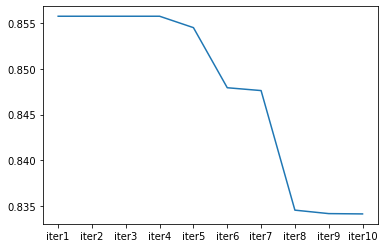

In [239]:
plt.plot(iterationcycles.keys(),iterationcycles.values())

## Model Evaluation

    1.Transform test dataset using StandardScaler
    2.Drop the columns in test features to match the trained features
    3.Evaluate the model using test data
    4.Check if the Model is overfitting

##### Transform test dataset using StandardScaler

In [240]:
y_test = df_test['SalePrice']
X_test = df_test.loc[:,df_test.columns != 'SalePrice']

In [241]:
X_test[num_vars] = ss_scaler.transform(X_test[num_vars])

##### Drop the columns in test features to match the trained features

In [242]:
X_test_rfe= X_test[['Functional_grp_others', 'monthage_AfterRenovation', 'MSZoning_FV',
       'MSZoning_RM', 'ExterQual_grp_others', 'LandContour_HLS',
       'MasVnrType_Stone', 'MasVnrType_None', 'MasVnrType_BrkFace',
       'LandSlope_Sev', 'Neighborhood_grp_G', 'Fireplaces_grp_others',
       'RoofMatl_grp_others', 'RoofStyle_grp_C', 'BsmtExposure_grp_Gd',
       'OverallQual_grp_D', '1stFlrSF', 'Fireplaces_grp_1.0',
       'KitchenQual_grp_others', 'TotalBsmtSF', '2ndFlrSF']]
X_test_sm = sm.add_constant(X_test_rfe)

In [243]:
X_test_sm.shape

(438, 22)

##### Evaluate the model using test data
    1.Predict target variable for test data
    2.Calculate Residual for test data
    3.Calculate RMSE ad R2 score for test data
    4.Check if the model is overfitting

In [244]:
y_test_pred = lr_model.predict(X_test_sm)
res = y_test - y_test_pred
mse = mean_squared_error(y_test, y_test_pred)
rmse = mse**0.5
print('RMSE :',rmse)
r2score = r2_score(y_test, y_test_pred)
print('R2 Score :',r2score)



RMSE : 54114.35739033148
R2 Score : 0.6423340030638842


<AxesSubplot:ylabel='Density'>

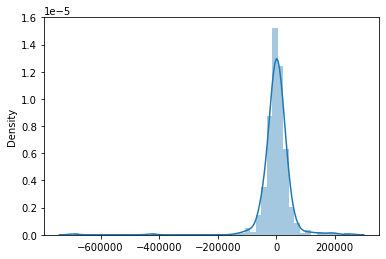

In [245]:
sns.distplot(res)

##### Observations on performing RFE using Linear Regression

    1. The Training accuracy score is :  83.5%
    2. The Testing accuracy scrore is : 64.23%
    
    The model is identified to by Overfitting

## Steps to handle Overfitting

### L2 or Ridge Regulaization 

     The optimal alpha value  for L2 is identified to be :  30

In [246]:
params = {'alpha':[0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20,30,40, 50,75,90,
                                   100,120,200,250,300,350,400,450, 500,600,650,700,750,800,850 ,1000]}

ridge = Ridge()
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed:    6.8s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30,
                                   40, 50, 75, 90, 100, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [247]:
print("Best alpha param for Ridge",model_cv.best_params_)

Best alpha param for Ridge {'alpha': 30}


##### Training the data using Ridge


In [248]:
alpha = 30
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)


Ridge(alpha=30)

In [249]:
metric = []

##### Ridge Coefficients

In [250]:
ridge.coef_

array([ 1.01906930e+03,  2.85757267e+03,  2.92020258e+01,  3.18752207e+01,
        2.15437546e+03,  4.79546830e+03,  6.00267676e+03,  7.20765086e+03,
        1.35567886e+04, -3.34350464e+02,  1.72508451e+04,  9.14015854e+01,
       -4.03283265e+02,  1.25024227e+03,  4.55169243e+02, -5.11644462e+03,
       -1.01787893e+04,  1.66497701e+03,  4.09833663e+03,  3.57498099e+03,
        2.20589292e+03,  2.11509763e+03,  1.72168979e+03,  1.08274665e+03,
        2.53756114e+03, -7.48816902e+02,  5.59126172e-01, -2.63724265e+01,
        1.41916619e+00, -2.77915930e+01, -1.73595877e+03, -2.48928953e+03,
       -3.66135329e+03, -3.03631467e+03,  1.91985258e+03,  9.96546032e+02,
        6.22320603e+03, -2.61240539e+03,  3.21192035e+03,  4.23942428e+03,
       -4.04928654e+02, -5.87127653e+02,  6.79907878e+03, -3.61376965e+03,
       -6.48066292e+02, -8.99182887e+02,  4.09270529e+03, -3.40264204e+03,
       -3.43661000e+02,  5.86451209e+02, -2.06372178e+03, -5.15729222e+03,
       -2.17567086e+03, -

##### Training  data  accuracy using Ridge


In [251]:
y_pred_train_ridge = ridge.predict(X_train)
r2_train_ridge = r2_score(y_train, y_pred_train_ridge)
print('RMSE of training data using Ridge:',mean_squared_error(y_train,y_pred_train_ridge)**0.5)
print('Variation % explained  in training dataset:',r2_train_ridge*100,'%')
metric.append(r2_train_ridge)
metric.append(mean_squared_error(y_train,y_pred_train_ridge)**0.5)

RMSE of training data using Ridge: 23411.38580453139
Variation % explained  in training dataset: 90.03556712726136 %


##### Testing data accuracy using Ridge

In [252]:
y_pred_test_ridge = ridge.predict(X_test)
r2_test_ridge = r2_score(y_test, y_pred_test_ridge)
print('RMSE of Test data using Ridge:',mean_squared_error(y_test,y_pred_test_ridge)**0.5)
print('Variation % explained  in test dataset:',r2_test_ridge*100,'%')
metric.append(r2_test_ridge)
metric.append(mean_squared_error(y_test,y_pred_test_ridge)**0.5)

RMSE of Test data using Ridge: 48705.79271273301
Variation % explained  in test dataset: 71.02563844419707 %


### L1 or Lasso Regularization 

     The optimal alpha value for L1 identified to be :  200

In [253]:
lasso =Lasso()
metric2=[]
params = {'alpha':[0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20,30,40, 50,75,90,
                                   100,120,200,250,300,350,400,450, 500,600,650,700,750,800,850 ,1000]}
cv =5

 
model_lasso = GridSearchCV(estimator=lasso,
                          param_grid= params,
                        scoring = 'neg_mean_absolute_error',
                          cv=cv,
                          return_train_score=True ,
                          verbose=1)
model_lasso.fit(X_train,y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed:   31.0s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30,
                                   40, 50, 75, 90, 100, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [254]:
print('Best alpha param for Lasso: ', model_lasso.best_params_)

Best alpha param for Lasso:  {'alpha': 200}


##### Training the data using Lasso

In [255]:
lasso = Lasso(alpha=200)
lasso.fit(X_train,y_train)

Lasso(alpha=200)

##### Lasso Coefficients

In [256]:
lasso.coef_

array([ 7.23768447e+02,  2.23441523e+03,  2.44344962e+01,  1.96515267e+01,
        1.03612858e+02,  0.00000000e+00,  9.93134789e+03,  0.00000000e+00,
        2.19480958e+03, -1.12760271e+03,  3.16255128e+04,  0.00000000e+00,
       -2.95255650e+02,  0.00000000e+00, -0.00000000e+00, -4.73103209e+03,
       -1.71132653e+04,  0.00000000e+00,  4.38725831e+03,  3.16460539e+03,
        2.09402528e+03,  1.79991629e+03,  1.31298415e+03,  6.17033734e+02,
        2.42530422e+03, -5.11569606e+02,  9.18102995e-01, -4.06365434e+01,
        1.33795388e+01, -1.81668706e+01, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -2.21930687e+02,  0.00000000e+00,  0.00000000e+00,
        6.79682667e+03, -1.20977522e+03,  0.00000000e+00,  8.48851059e+02,
       -0.00000000e+00, -0.00000000e+00,  7.24159887e+03, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  2.91469068e+03, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -

In [257]:
metric2= []

##### Training  data accuracy  using Lasso

In [258]:
y_train_pred_lasso = lasso.predict(X_train)
print('RMSE of Train data using Lasso:' , mean_squared_error(y_train , y_train_pred_lasso)**0.5 )
print('Variation % explained  in training dataset:' , r2_score(y_train , y_train_pred_lasso)*100,'%')
metric2.append(r2_score(y_train , y_train_pred_lasso))
metric2.append(mean_squared_error(y_train , y_train_pred_lasso)**0.5)

RMSE of Train data using Lasso: 23733.138198150755
Variation % explained  in training dataset: 89.75979435585293 %


##### Test  data accuracy  using Lasso

In [259]:
y_test_pred_lasso = lasso.predict(X_test)
print('RMSE of Test data using Lasso:' , mean_squared_error(y_test , y_test_pred_lasso)**0.5 )
print('Variation % explained  in Test dataset:' , r2_score(y_test , y_test_pred_lasso)*100,'%')
metric2.append(r2_score(y_test , y_test_pred_lasso))
metric2.append(mean_squared_error(y_test , y_test_pred_lasso)**0.5)

RMSE of Test data using Lasso: 49423.83623640543
Variation % explained  in Test dataset: 70.16503403049296 %


### Evaluation metrics for Ridge and Lasso

In [263]:
lr_table = pd.Series( ['R2 Score (Train)','MSE (Train)','R2 Score (Test)','MSE (Test)'] ,name='Metric')
rg_metric = pd.Series(metric, name = 'Ridge Regression')
ls_metric = pd.Series(metric2, name = 'Lasso Regression')
final_metric = pd.concat([ lr_table,rg_metric, ls_metric], axis = 1)
final_metric

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.900356,0.897598
1,MSE (Train),23411.385805,23733.138198
2,R2 Score (Test),0.710256,0.701650
3,MSE (Test),48705.792713,49423.836236


### Coefficient comparison for Ridge and Lasso

In [264]:
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
pd.set_option('display.max_rows', None)
#betas.sort_values('Lasso' ,ascending=False)

,Ridge,Lasso
GrLivArea,17250.845132,31625.512846
ExterQual_grp_others,12367.490590,16667.557611
Neighborhood_grp_G,11718.825530,16362.200920
BsmtExposure_grp_Gd,12420.057762,14894.341844
BsmtQual_grp_others,12951.394377,14717.654226
KitchenQual_grp_others,12666.414994,13963.364726
OverallQual_grp_D,10302.370440,12858.204044
TotalBsmtSF,6002.676757,9931.347890
SaleType_grp_others,8600.706934,8483.560231
LandContour_HLS,6799.078778,7241.598869


### Comparison of  fits between various  models on the target variable

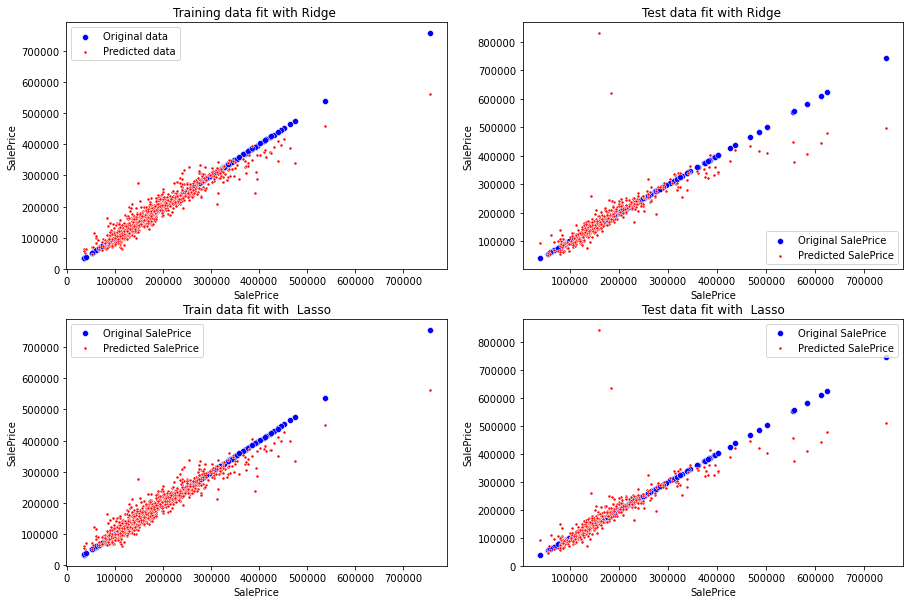

In [262]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.title("Training data fit with Ridge ")
sns.scatterplot(x=y_train, y=y_train, marker='o' ,color="b")
sns.scatterplot(x=y_train, y=y_pred_train_ridge, marker='.' ,color="r")
plt.legend(labels=['Original data', 'Predicted data'])


plt.subplot(2,2,2)
plt.title("Test data fit with Ridge ")
sns.scatterplot(x=y_test, y=y_test, marker='o' ,color="b")
sns.scatterplot(x=y_test, y=y_pred_test_ridge, marker='.' ,color="r")
plt.legend(labels=['Original SalePrice', 'Predicted SalePrice'])

plt.subplot(2,2,3)
plt.title("Train data fit with  Lasso")
sns.scatterplot(x=y_train, y=y_train, marker='o' ,color="b")
sns.scatterplot(x=y_train, y=y_train_pred_lasso, marker='.' ,color="r")
plt.legend(labels=['Original SalePrice', 'Predicted SalePrice'])

plt.subplot(2,2,4)
plt.title("Test data fit with  Lasso")
sns.scatterplot(x=y_test, y=y_test, marker='o' ,color="b")
sns.scatterplot(x=y_test, y=y_test_pred_lasso, marker='.' ,color="r")
plt.legend(labels=['Original SalePrice', 'Predicted SalePrice'])

## Summary

    
    
    Variation % explained in Test data for Linear Regression model:  64.2%
    Variation % explained in Test data for Ridge model: 71.32%
    Variation % explained in Test data for Lasso model: 71.25%
    
    
    
   #### Ridge  model is identified to be more suitable for  the given dataset